In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
from sklearn.metrics import silhouette_score

In [2]:
# Load the excel file(s) 
df = pd.read_csv('clustered_data.csv')
df

,Unnamed: 0,distance,OrderID,WebsiteID,OrderDate,Courier,ProductsExVAT,DeliveryExVAT,DateDespatched,DeliveryCost,Weight,Volume (m3),Pallets,id,Outward Code,Country,latitude,longitude,Cluster Label
0,0,26.84,2295440,7700,18/04/2023,MFS,375.40,0.00,18/04/2023,34.46,110.00,0.225000,0.200000,766,DY6,United Kingdom,52.496759,-2.173682,1
1,1,26.84,2277415,67940,28/03/2023,DX Freight,236.61,0.00,28/03/2023,16.45,33.30,0.959000,0.473039,766,DY6,United Kingdom,52.496759,-2.173682,1
2,2,26.84,2279524,67940,30/03/2023,DX Freight,70.58,13.20,30/03/2023,11.79,21.80,0.209100,0.222222,766,DY6,United Kingdom,52.496759,-2.173682,1
3,3,26.84,2275231,483789,27/03/2023,DX Express,76.95,7.22,27/03/2023,6.81,17.77,0.040200,0.030342,766,DY6,United Kingdom,52.496759,-2.173682,1
4,4,26.84,2285334,483789,05/04/2023,DX Express,147.30,0.00,05/04/2023,11.46,34.70,0.100552,0.052361,766,DY6,United Kingdom,52.496759,-2.173682,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,4114,16.23,2282828,884822,03/04/2023,DX Express,36.26,7.21,03/04/2023,6.80,4.86,0.108550,0.055556,50,B15,United Kingdom,52.462825,-1.927011,1
4115,4115,34.22,2283491,896767,04/04/2023,DX Express,111.40,19.99,04/04/2023,8.04,23.80,0.127600,0.185185,2937,WV7,United Kingdom,52.633048,-2.270047,1
4116,4116,34.22,2294508,896767,18/04/2023,DX Freight,90.09,32.22,18/04/2023,10.92,18.90,1.411200,0.750000,2937,WV7,United Kingdom,52.633048,-2.270047,1
4117,4117,38.17,2294964,901125,18/04/2023,DX Freight,278.64,0.00,18/04/2023,14.77,29.88,4.070664,1.511111,1456,LE13,United Kingdom,52.763672,-0.890501,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4119 non-null   int64  
 1   distance        4119 non-null   float64
 2   OrderID         4119 non-null   int64  
 3   WebsiteID       4119 non-null   int64  
 4   OrderDate       4119 non-null   object 
 5   Courier         4119 non-null   object 
 6   ProductsExVAT   4119 non-null   float64
 7   DeliveryExVAT   4119 non-null   float64
 8   DateDespatched  4119 non-null   object 
 9   DeliveryCost    4119 non-null   float64
 10  Weight          4119 non-null   float64
 11  Volume (m3)     4119 non-null   float64
 12  Pallets         4119 non-null   float64
 13  id              4119 non-null   int64  
 14  Outward Code    4119 non-null   object 
 15  Country         4119 non-null   object 
 16  latitude        4119 non-null   float64
 17  longitude       4119 non-null   f

In [4]:
# Converting the formats of the two dates
df['OrderDate'] = pd.to_datetime(df['OrderDate'], format='%d/%m/%Y')
df['DateDespatched'] = pd.to_datetime(df['DateDespatched'], format='%d/%m/%Y')

# Converting OrderID to string data type
df['OrderID'] = df['OrderID'].astype(str)
df['WebsiteID'] = df['WebsiteID'].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      4119 non-null   int64         
 1   distance        4119 non-null   float64       
 2   OrderID         4119 non-null   object        
 3   WebsiteID       4119 non-null   object        
 4   OrderDate       4119 non-null   datetime64[ns]
 5   Courier         4119 non-null   object        
 6   ProductsExVAT   4119 non-null   float64       
 7   DeliveryExVAT   4119 non-null   float64       
 8   DateDespatched  4119 non-null   datetime64[ns]
 9   DeliveryCost    4119 non-null   float64       
 10  Weight          4119 non-null   float64       
 11  Volume (m3)     4119 non-null   float64       
 12  Pallets         4119 non-null   float64       
 13  id              4119 non-null   int64         
 14  Outward Code    4119 non-null   object        
 15  Coun

In [5]:
# Drop irrelevant column
df.drop(columns=['Unnamed: 0'],inplace = True)

In [6]:
df

,distance,OrderID,WebsiteID,OrderDate,Courier,ProductsExVAT,DeliveryExVAT,DateDespatched,DeliveryCost,Weight,Volume (m3),Pallets,id,Outward Code,Country,latitude,longitude,Cluster Label
0,26.84,2295440,7700,2023-04-18,MFS,375.40,0.00,2023-04-18,34.46,110.00,0.225000,0.200000,766,DY6,United Kingdom,52.496759,-2.173682,1
1,26.84,2277415,67940,2023-03-28,DX Freight,236.61,0.00,2023-03-28,16.45,33.30,0.959000,0.473039,766,DY6,United Kingdom,52.496759,-2.173682,1
2,26.84,2279524,67940,2023-03-30,DX Freight,70.58,13.20,2023-03-30,11.79,21.80,0.209100,0.222222,766,DY6,United Kingdom,52.496759,-2.173682,1
3,26.84,2275231,483789,2023-03-27,DX Express,76.95,7.22,2023-03-27,6.81,17.77,0.040200,0.030342,766,DY6,United Kingdom,52.496759,-2.173682,1
4,26.84,2285334,483789,2023-04-05,DX Express,147.30,0.00,2023-04-05,11.46,34.70,0.100552,0.052361,766,DY6,United Kingdom,52.496759,-2.173682,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,16.23,2282828,884822,2023-04-03,DX Express,36.26,7.21,2023-04-03,6.80,4.86,0.108550,0.055556,50,B15,United Kingdom,52.462825,-1.927011,1
4115,34.22,2283491,896767,2023-04-04,DX Express,111.40,19.99,2023-04-04,8.04,23.80,0.127600,0.185185,2937,WV7,United Kingdom,52.633048,-2.270047,1
4116,34.22,2294508,896767,2023-04-18,DX Freight,90.09,32.22,2023-04-18,10.92,18.90,1.411200,0.750000,2937,WV7,United Kingdom,52.633048,-2.270047,1
4117,38.17,2294964,901125,2023-04-18,DX Freight,278.64,0.00,2023-04-18,14.77,29.88,4.070664,1.511111,1456,LE13,United Kingdom,52.763672,-0.890501,2


In [7]:
# Create separate dataframe for each cluster
df_cluster0 = df[df['Cluster Label'] == 0]
df_cluster1 = df[df['Cluster Label'] == 1]
df_cluster2 = df[df['Cluster Label'] == 2]
df_cluster3 = df[df['Cluster Label'] == 3]
df_cluster4 = df[df['Cluster Label'] == 4]



### Total weight and dimensions per clusters

In [9]:
# Calculate the total delivery cost, weight, volume and pallets per cluster
df_clustersum = df.groupby(['Cluster Label'],as_index = False)[['Weight','Volume (m3)','Pallets']].sum()
df_clustersum

,Cluster Label,Weight,Volume (m3),Pallets
0,0,27938.85,255.433941,171.720796
1,1,130033.61,1179.409090,751.950014
2,2,97070.17,834.127338,554.235565
3,3,56593.10,593.240626,402.366895
4,4,44366.55,501.647308,317.847010


### Count of orders per cluster

In [10]:
# Calculate the number of orders per cluster
df_cluster_order = df.groupby(['Cluster Label'],as_index = False)[['OrderID']].count()
df_cluster_order

,Cluster Label,OrderID
0,0,382
1,1,1285
2,2,1080
3,3,760
4,4,612


### Count of Despatched Date per cluster

In [11]:
# Calculate the number of days per cluster
df_cluster_days= df.groupby(['Cluster Label'],as_index = False)[['DateDespatched']].nunique()
df_cluster_days

,Cluster Label,DateDespatched
0,0,19
1,1,21
2,2,20
3,3,19
4,4,20


In [12]:
cluster_daily_merged = pd.merge(df_clustersum,df_cluster_order,how='left')
cluster_daily_merged

,Cluster Label,Weight,Volume (m3),Pallets,OrderID
0,0,27938.85,255.433941,171.720796,382
1,1,130033.61,1179.409090,751.950014,1285
2,2,97070.17,834.127338,554.235565,1080
3,3,56593.10,593.240626,402.366895,760
4,4,44366.55,501.647308,317.847010,612


In [13]:
cluster_daily_merged2 = pd.merge(cluster_daily_merged,df_cluster_days,how='left')
cluster_daily_merged2

,Cluster Label,Weight,Volume (m3),Pallets,OrderID,DateDespatched
0,0,27938.85,255.433941,171.720796,382,19
1,1,130033.61,1179.409090,751.950014,1285,21
2,2,97070.17,834.127338,554.235565,1080,20
3,3,56593.10,593.240626,402.366895,760,19
4,4,44366.55,501.647308,317.847010,612,20


In [97]:
cluster_daily_merged2['avg.daily_weight'] = cluster_daily_merged2['Weight']/cluster_daily_merged2['DateDespatched']
cluster_daily_merged2['avg.daily_volume'] = cluster_daily_merged2['Volume (m3)']/cluster_daily_merged2['DateDespatched']
cluster_daily_merged2['avg.daily_pallets'] = cluster_daily_merged2['Pallets']/cluster_daily_merged2['DateDespatched']
cluster_daily_merged2['avg.dailycount_orders'] = cluster_daily_merged2['OrderID']/cluster_daily_merged2['DateDespatched']

cluster_daily_merged2

,Cluster Label,Weight,Volume (m3),Pallets,OrderID,DateDespatched,avg.daily_weight,avg.daily_volume,avg.daily_pallets,avg.count_orders,avg.dailycount_orders
0,0,27938.85,255.433941,171.720796,382,19,1470.465789,13.443892,9.037937,20.105263,20.105263
1,1,130033.61,1179.409090,751.950014,1285,21,6192.076667,56.162338,35.807144,61.190476,61.190476
2,2,97070.17,834.127338,554.235565,1080,20,4853.508500,41.706367,27.711778,54.000000,54.000000
3,3,56593.10,593.240626,402.366895,760,19,2978.584211,31.223191,21.177205,40.000000,40.000000
4,4,44366.55,501.647308,317.847010,612,20,2218.327500,25.082365,15.892350,30.600000,30.600000


In [98]:
cluster_daily_avg = cluster_daily_merged2[['Cluster Label','avg.daily_weight',
                                          'avg.daily_volume','avg.daily_pallets','avg.dailycount_orders']]

cluster_daily_avg

,Cluster Label,avg.daily_weight,avg.daily_volume,avg.daily_pallets,avg.dailycount_orders
0,0,1470.465789,13.443892,9.037937,20.105263
1,1,6192.076667,56.162338,35.807144,61.190476
2,2,4853.508500,41.706367,27.711778,54.000000
3,3,2978.584211,31.223191,21.177205,40.000000
4,4,2218.327500,25.082365,15.892350,30.600000


### Exclude DX Express in the same analysis

In [81]:
df_nonDX = df.loc[df['Courier'] != 'DX Express']

In [82]:
# Calculate the total delivery cost, weight, volume and pallets per cluster
df_clustersum2 = df_nonDX.groupby(['Cluster Label'],as_index = False)[['Weight','Volume (m3)','Pallets']].sum()
df_clustersum2

,Cluster Label,Weight,Volume (m3),Pallets
0,0,25884.46,246.582935,163.939849
1,1,123267.17,1146.841855,725.150801
2,2,90709.93,806.147071,529.110237
3,3,52817.00,575.228573,386.948757
4,4,40935.96,486.073127,304.346294


In [83]:
# Calculate the number of orders per cluster
df_cluster_order2 = df_nonDX.groupby(['Cluster Label'],as_index = False)[['OrderID']].count()
df_cluster_order2

,Cluster Label,OrderID
0,0,235
1,1,811
2,2,653
3,3,482
4,4,380


In [86]:
# Calculate the number of days per cluster
df_cluster_days2= df_nonDX.groupby(['Cluster Label'],as_index = False)[['DateDespatched']].nunique()
df_cluster_days2

,Cluster Label,DateDespatched
0,0,19
1,1,21
2,2,20
3,3,19
4,4,19


In [87]:
cluster_daily_mergedA = pd.merge(df_clustersum2,df_cluster_order2,how='left')
cluster_daily_mergedA

,Cluster Label,Weight,Volume (m3),Pallets,OrderID
0,0,25884.46,246.582935,163.939849,235
1,1,123267.17,1146.841855,725.150801,811
2,2,90709.93,806.147071,529.110237,653
3,3,52817.00,575.228573,386.948757,482
4,4,40935.96,486.073127,304.346294,380


In [89]:
cluster_daily_mergedB = pd.merge(cluster_daily_mergedA,df_cluster_days2,how='left')
cluster_daily_mergedB

,Cluster Label,Weight,Volume (m3),Pallets,OrderID,DateDespatched
0,0,25884.46,246.582935,163.939849,235,19
1,1,123267.17,1146.841855,725.150801,811,21
2,2,90709.93,806.147071,529.110237,653,20
3,3,52817.00,575.228573,386.948757,482,19
4,4,40935.96,486.073127,304.346294,380,19


In [93]:
cluster_daily_mergedB['avg.daily_weight'] = cluster_daily_mergedB['Weight']/cluster_daily_mergedB['DateDespatched']
cluster_daily_mergedB['avg.daily_volume'] = cluster_daily_mergedB['Volume (m3)']/cluster_daily_mergedB['DateDespatched']
cluster_daily_mergedB['avg.daily_pallets'] = cluster_daily_mergedB['Pallets']/cluster_daily_mergedB['DateDespatched']
cluster_daily_mergedB['avg.dailycount_orders'] = cluster_daily_mergedB['OrderID']/cluster_daily_mergedB['DateDespatched']

cluster_daily_mergedB

,Cluster Label,Weight,Volume (m3),Pallets,OrderID,DateDespatched,avg.daily_weight,avg.daily_volume,avg.daily_pallets,avg.count_orders,avg.dailycount_orders
0,0,25884.46,246.582935,163.939849,235,19,1362.340000,12.978049,8.628413,12.368421,12.368421
1,1,123267.17,1146.841855,725.150801,811,21,5869.865238,54.611517,34.530991,38.619048,38.619048
2,2,90709.93,806.147071,529.110237,653,20,4535.496500,40.307354,26.455512,32.650000,32.650000
3,3,52817.00,575.228573,386.948757,482,19,2779.842105,30.275188,20.365724,25.368421,25.368421
4,4,40935.96,486.073127,304.346294,380,19,2154.524211,25.582796,16.018226,20.000000,20.000000


In [95]:
cluster_daily_avg2 = cluster_daily_mergedB[['Cluster Label','avg.daily_weight',
                                          'avg.daily_volume','avg.daily_pallets','avg.dailycount_orders']]

cluster_daily_avg2

,Cluster Label,avg.daily_weight,avg.daily_volume,avg.daily_pallets,avg.dailycount_orders
0,0,1362.340000,12.978049,8.628413,12.368421
1,1,5869.865238,54.611517,34.530991,38.619048
2,2,4535.496500,40.307354,26.455512,32.650000
3,3,2779.842105,30.275188,20.365724,25.368421
4,4,2154.524211,25.582796,16.018226,20.000000


### PLEASE IGNORE BELOW

In [ ]:
# Calculate the average delivery cost, weight, volume and pallets per cluster
df_clusteravg = df.groupby(['Cluster Label'],as_index = False)[['ProductsExVAT',
                                                                       'DeliveryCost',
                                                                       'Weight','Volume (m3)',
                                                                       'Pallets','distance']].mean()
df_clusteravg

In [16]:
# Drop irrelevant column
df2 = df[['DeliveryCost','Weight','Volume (m3)','Pallets','distance']]


<Axes: >

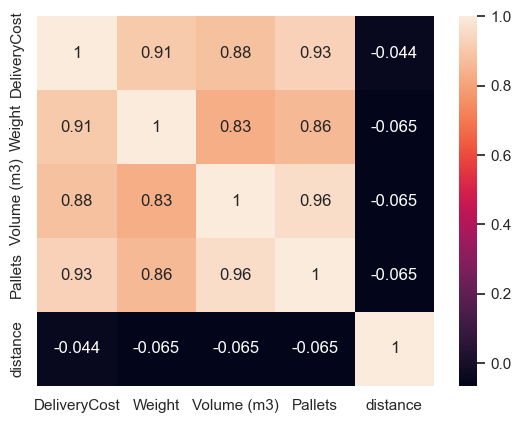

In [17]:
# View Correlation amount the columns using 'Pearson' method.
corr = df2.corr()

# Heatmap of the correlation.
sns.heatmap(data=corr, annot=True)

In [18]:
df_cluster_order.sum()


Cluster Label      10
OrderID          4119
dtype: int64

In [19]:
df_clusterdate = df.groupby(['Cluster Label','DateDespatched'],as_index = False)[['ProductsExVAT',
                                                                       'DeliveryCost',
                                                                       'Weight','Volume (m3)',
                                                                       'Pallets']].sum()
df_clusterdate

,Cluster Label,DateDespatched,ProductsExVAT,DeliveryCost,Weight,Volume (m3),Pallets
0,0,2023-03-27,3010.56,400.28,974.27,7.780666,5.079077
1,0,2023-03-28,2199.96,281.07,575.02,10.572509,6.066943
2,0,2023-03-29,7530.78,784.46,2532.81,21.421539,16.604485
3,0,2023-03-30,2690.55,309.73,805.32,7.443202,4.476038
4,0,2023-03-31,3851.99,438.61,1000.21,14.114721,8.841516
...,...,...,...,...,...,...,...
94,4,2023-04-18,11623.34,1288.78,4138.71,44.584607,26.277705
95,4,2023-04-19,6517.41,790.98,1968.57,24.703302,15.565132
96,4,2023-04-20,4218.32,445.09,1009.71,19.945102,9.332875
97,4,2023-04-21,7842.62,943.82,2807.40,20.945526,17.354588


In [20]:
df_clusterdatemean = df.groupby(['Cluster Label','DateDespatched'],as_index = False)[['ProductsExVAT',
                                                                       'DeliveryCost',
                                                                       'Weight','Volume (m3)',
                                                                       'Pallets']].mean()
df_clusterdatemean

,Cluster Label,DateDespatched,ProductsExVAT,DeliveryCost,Weight,Volume (m3),Pallets
0,0,2023-03-27,177.091765,23.545882,57.310000,0.457686,0.298769
1,0,2023-03-28,115.787368,14.793158,30.264211,0.556448,0.319313
2,0,2023-03-29,251.026000,26.148667,84.427000,0.714051,0.553483
3,0,2023-03-30,158.267647,18.219412,47.371765,0.437835,0.263296
4,0,2023-03-31,175.090455,19.936818,45.464091,0.641578,0.401887
...,...,...,...,...,...,...,...
94,4,2023-04-18,290.583500,32.219500,103.467750,1.114615,0.656943
95,4,2023-04-19,191.688529,23.264118,57.899118,0.726568,0.457798
96,4,2023-04-20,162.243077,17.118846,38.835000,0.767119,0.358957
97,4,2023-04-21,301.639231,36.300769,107.976923,0.805597,0.667484


C:\Users\christina.hudaja\AppData\Local\Temp\ipykernel_15900\1473292439.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  a = sns.lineplot(x='DateDespatched',y='DeliveryCost',hue='Cluster Label',data=df_clusterdate,ci=None, markers = True,


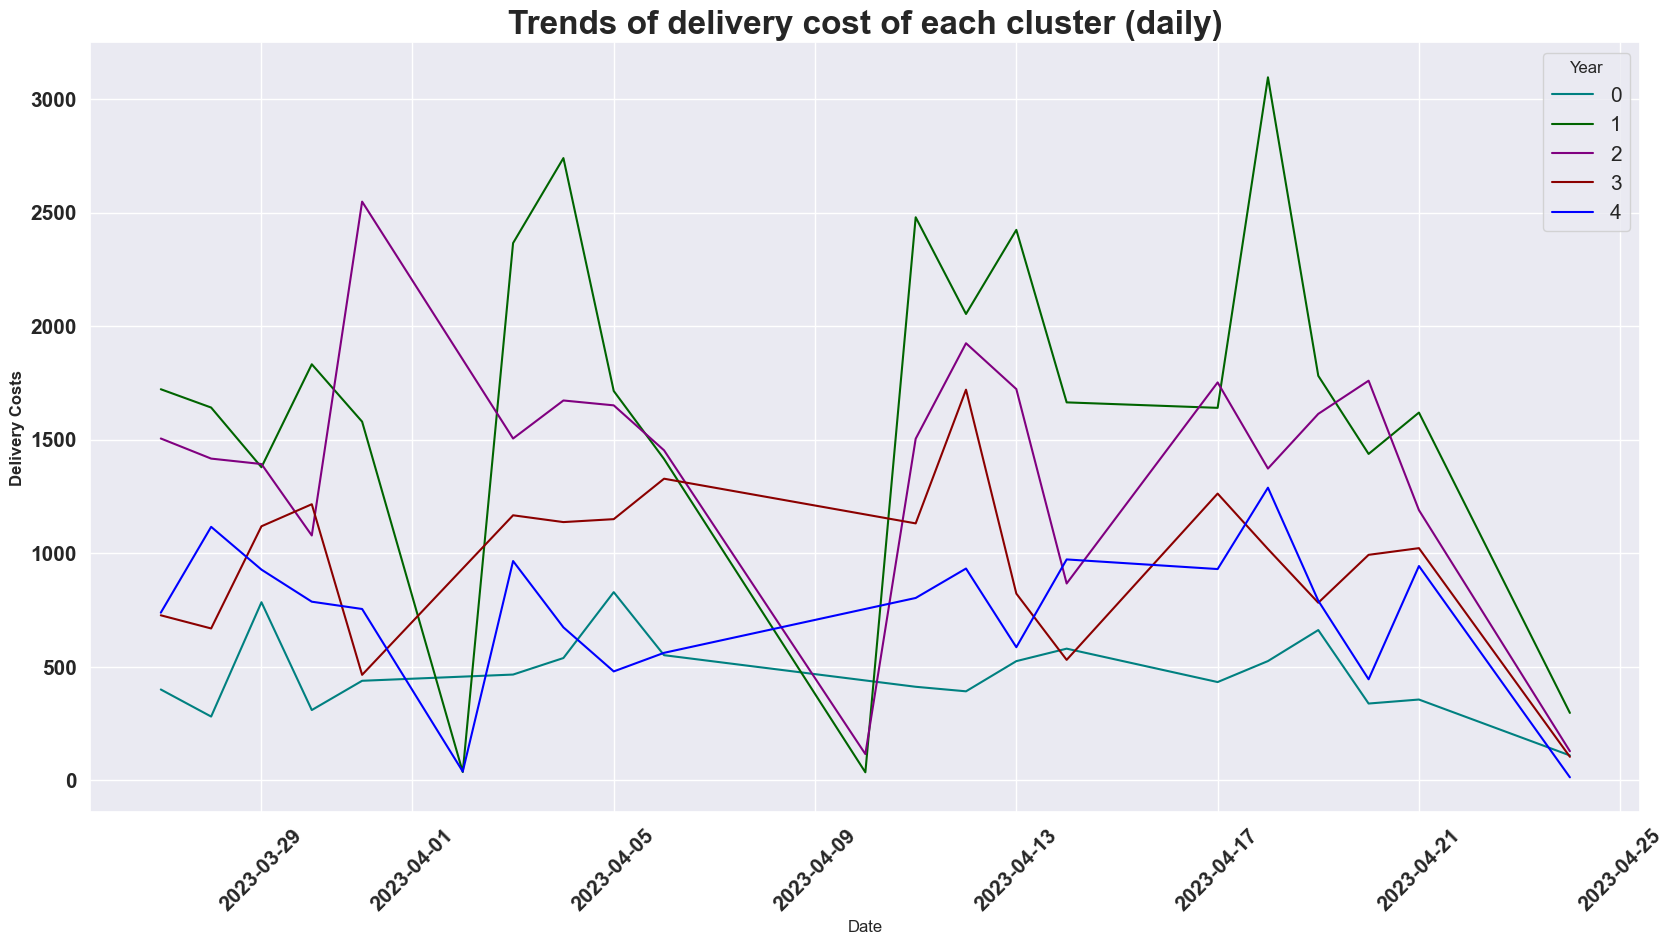

In [21]:
# Set figure size.
a = sns.set(rc={'figure.figsize':(20, 10)})

# Create a lineplot.
a = sns.lineplot(x='DateDespatched',y='DeliveryCost',hue='Cluster Label',data=df_clusterdate,ci=None, markers = True,
                 palette=['teal','darkgreen','purple','darkred','blue'])
a.set_title("Trends of delivery cost of each cluster (daily)",fontsize=24,fontweight='bold')
a.set_ylabel("Delivery Costs",fontweight='bold')
a.set_xlabel("Date")
plt.legend(title='Year', fontsize=15)
plt.xticks(size=15,fontweight='bold',rotation = 45)
plt.yticks(size=15,fontweight='bold')

# displaying chart.
plt.show()

# Save chart
fig = a.get_figure()
fig.savefig('Appointments.jpg')
fig.savefig('Appointments.png')


C:\Users\christina.hudaja\AppData\Local\Temp\ipykernel_15900\291237348.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  a = sns.lineplot(x='DateDespatched',y='Weight',hue='Cluster Label',data=df_clusterdate,ci=None, markers = True,


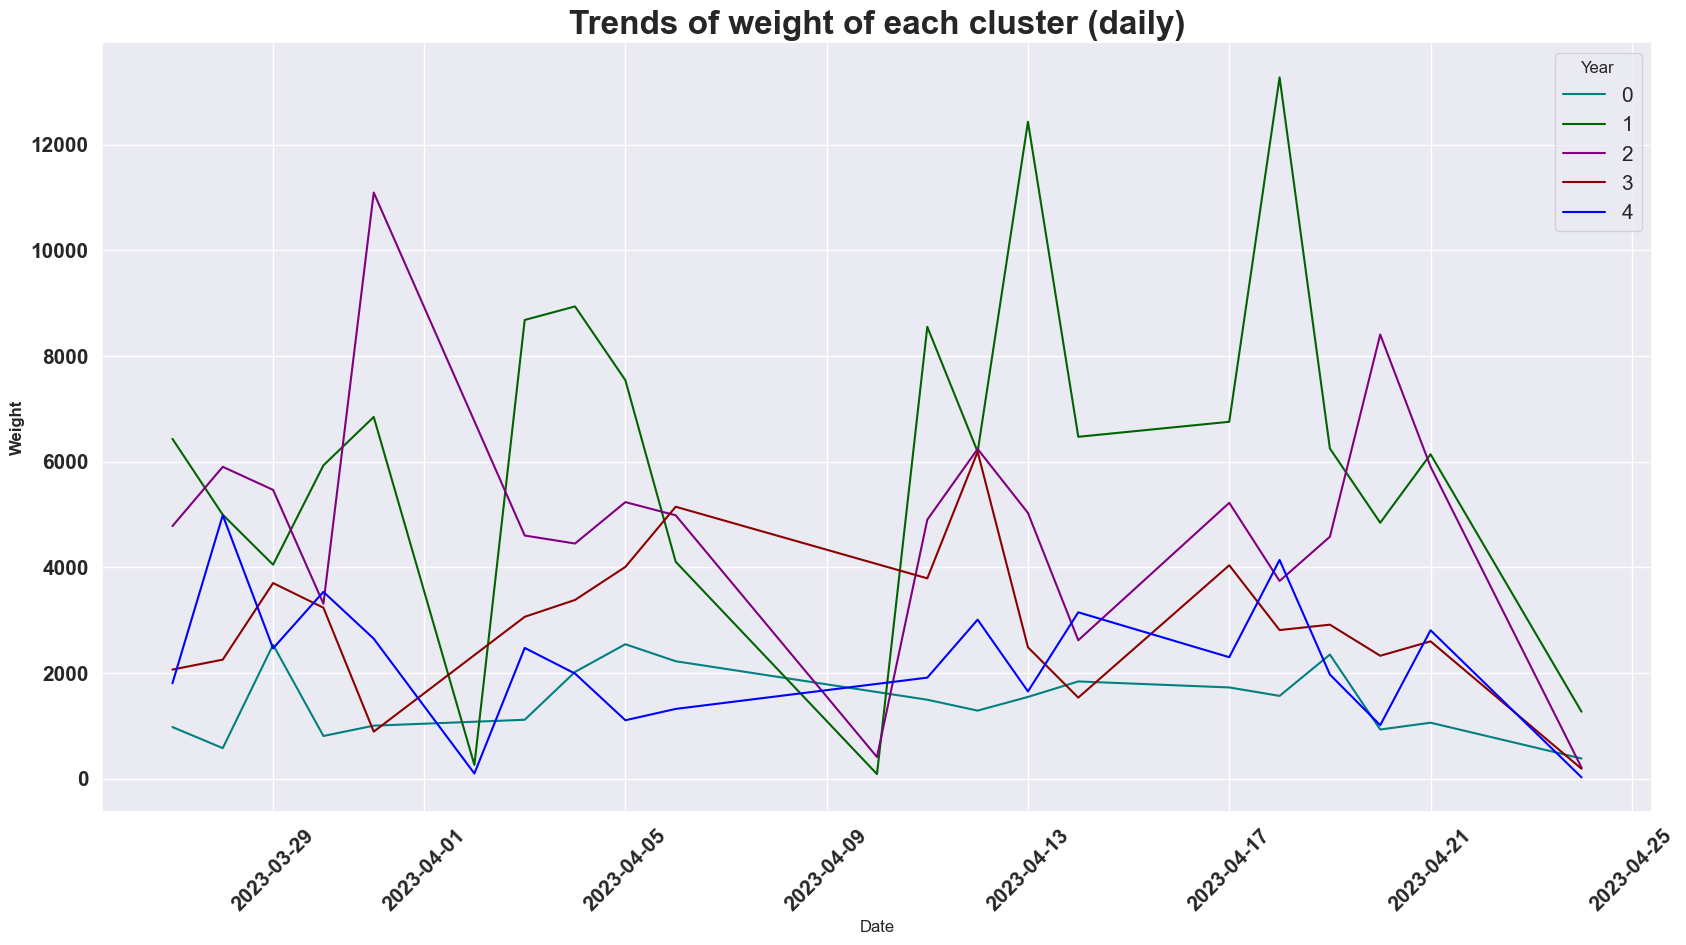

In [22]:
# Set figure size.
a = sns.set(rc={'figure.figsize':(20, 10)})

# Create a lineplot.
a = sns.lineplot(x='DateDespatched',y='Weight',hue='Cluster Label',data=df_clusterdate,ci=None, markers = True,
                 palette=['teal','darkgreen','purple','darkred','blue'])
a.set_title("Trends of weight of each cluster (daily)",fontsize=24,fontweight='bold')
a.set_ylabel("Weight",fontweight='bold')
a.set_xlabel("Date")
plt.legend(title='Year', fontsize=15)
plt.xticks(size=15,fontweight='bold',rotation = 45)
plt.yticks(size=15,fontweight='bold')

# displaying chart.
plt.show()

# Save chart
fig = a.get_figure()
fig.savefig('Appointments.jpg')
fig.savefig('Appointments.png')


In [23]:
df_clusterdate_1 =  df_clusterdate[df_clusterdate['Cluster Label'] == 1]
df_clusterdate_3 =  df_clusterdate[df_clusterdate['Cluster Label'] == 3]


df_clusterdate_1_3 = df_clusterdate_1.append(df_clusterdate_3,ignore_index = True)


C:\Users\christina.hudaja\AppData\Local\Temp\ipykernel_15900\3473132470.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clusterdate_1_3 = df_clusterdate_1.append(df_clusterdate_3,ignore_index = True)


C:\Users\christina.hudaja\AppData\Local\Temp\ipykernel_15900\2876506331.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  a = sns.lineplot(x='DateDespatched',y='DeliveryCost',hue='Cluster Label',data=df_clusterdate_1_3,ci=None, markers = True,


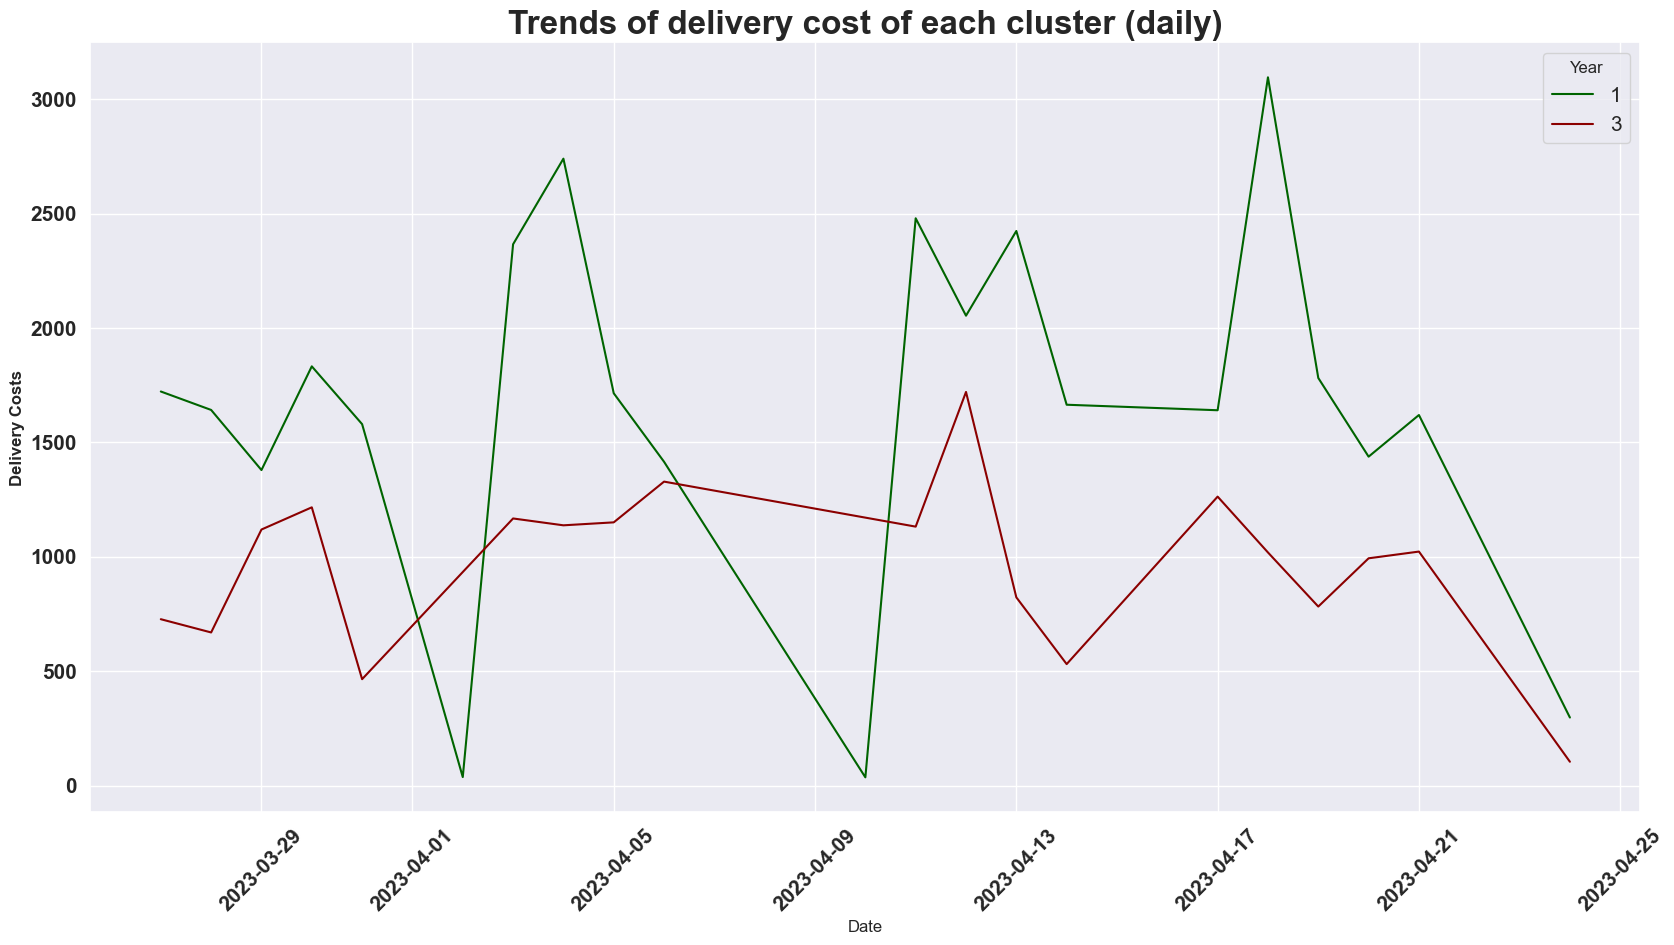

In [24]:
# Set figure size.
a = sns.set(rc={'figure.figsize':(20, 10)})

# Create a lineplot.
a = sns.lineplot(x='DateDespatched',y='DeliveryCost',hue='Cluster Label',data=df_clusterdate_1_3,ci=None, markers = True,
                 palette=['darkgreen','darkred'])
a.set_title("Trends of delivery cost of each cluster (daily)",fontsize=24,fontweight='bold')
a.set_ylabel("Delivery Costs",fontweight='bold')
a.set_xlabel("Date")
plt.legend(title='Year', fontsize=15)
plt.xticks(size=15,fontweight='bold',rotation = 45)
plt.yticks(size=15,fontweight='bold')

# displaying chart.
plt.show()

# Save chart
fig = a.get_figure()
fig.savefig('Appointments.jpg')
fig.savefig('Appointments.png')

In [25]:
df_clusterdate_0 =  df_clusterdate[df_clusterdate['Cluster Label'] == 0]
df_clusterdate_2 =  df_clusterdate[df_clusterdate['Cluster Label'] == 2]
df_clusterdate_4 =  df_clusterdate[df_clusterdate['Cluster Label'] == 4]

df_clusterdate_024 = df_clusterdate_0.append([df_clusterdate_2,df_clusterdate_4],ignore_index = True)

C:\Users\christina.hudaja\AppData\Local\Temp\ipykernel_15900\2007132157.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clusterdate_024 = df_clusterdate_0.append([df_clusterdate_2,df_clusterdate_4],ignore_index = True)


In [26]:
df_clusterdate_024

,Cluster Label,DateDespatched,ProductsExVAT,DeliveryCost,Weight,Volume (m3),Pallets
0,0,2023-03-27,3010.56,400.28,974.27,7.780666,5.079077
1,0,2023-03-28,2199.96,281.07,575.02,10.572509,6.066943
2,0,2023-03-29,7530.78,784.46,2532.81,21.421539,16.604485
3,0,2023-03-30,2690.55,309.73,805.32,7.443202,4.476038
4,0,2023-03-31,3851.99,438.61,1000.21,14.114721,8.841516
5,0,2023-04-03,3570.76,466.02,1112.09,13.230888,9.436697
6,0,2023-04-04,5348.69,538.77,2018.73,16.370052,12.167812
7,0,2023-04-05,7672.81,828.84,2542.48,25.879257,16.789689
8,0,2023-04-06,5602.32,551.28,2220.68,23.344586,9.878486
9,0,2023-04-11,4363.52,412.21,1491.24,9.462528,7.110013


C:\Users\christina.hudaja\AppData\Local\Temp\ipykernel_15900\714844375.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  a = sns.lineplot(x='DateDespatched',y='DeliveryCost',hue='Cluster Label',data=df_clusterdate_024,ci=None, markers = True,
C:\Users\christina.hudaja\AppData\Local\Temp\ipykernel_15900\714844375.py:5: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  a = sns.lineplot(x='DateDespatched',y='DeliveryCost',hue='Cluster Label',data=df_clusterdate_024,ci=None, markers = True,


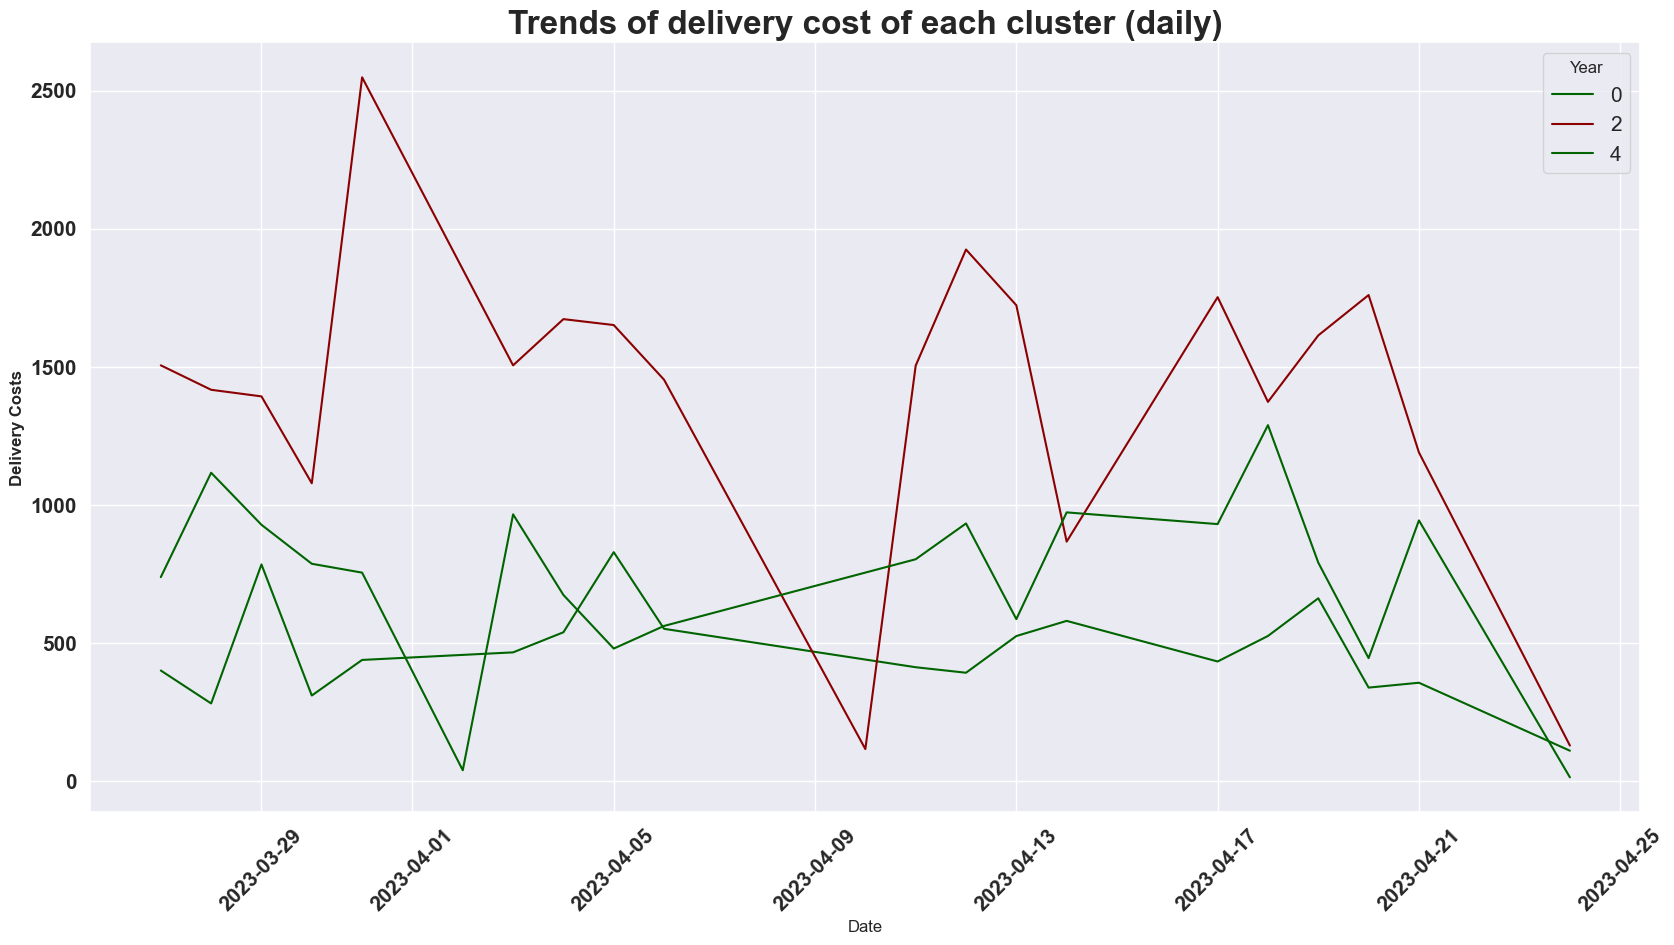

In [27]:
# Set figure size.
a = sns.set(rc={'figure.figsize':(20, 10)})

# Create a lineplot.
a = sns.lineplot(x='DateDespatched',y='DeliveryCost',hue='Cluster Label',data=df_clusterdate_024,ci=None, markers = True,
                 palette=['darkgreen','darkred'])
a.set_title("Trends of delivery cost of each cluster (daily)",fontsize=24,fontweight='bold')
a.set_ylabel("Delivery Costs",fontweight='bold')
a.set_xlabel("Date")
plt.legend(title='Year', fontsize=15)
plt.xticks(size=15,fontweight='bold',rotation = 45)
plt.yticks(size=15,fontweight='bold')

# displaying chart.
plt.show()

# Save chart
fig = a.get_figure()
fig.savefig('Appointments.jpg')
fig.savefig('Appointments.png')

In [28]:
df_clusterdateavg = df.groupby(['Cluster Label','DateDespatched'],as_index = False)[['ProductsExVAT',
                                                                       'DeliveryCost',
                                                                       'Weight','Volume (m3)',
                                                                       'Pallets']].mean()
df_clusterdateavg

,Cluster Label,DateDespatched,ProductsExVAT,DeliveryCost,Weight,Volume (m3),Pallets
0,0,2023-03-27,177.091765,23.545882,57.310000,0.457686,0.298769
1,0,2023-03-28,115.787368,14.793158,30.264211,0.556448,0.319313
2,0,2023-03-29,251.026000,26.148667,84.427000,0.714051,0.553483
3,0,2023-03-30,158.267647,18.219412,47.371765,0.437835,0.263296
4,0,2023-03-31,175.090455,19.936818,45.464091,0.641578,0.401887
...,...,...,...,...,...,...,...
94,4,2023-04-18,290.583500,32.219500,103.467750,1.114615,0.656943
95,4,2023-04-19,191.688529,23.264118,57.899118,0.726568,0.457798
96,4,2023-04-20,162.243077,17.118846,38.835000,0.767119,0.358957
97,4,2023-04-21,301.639231,36.300769,107.976923,0.805597,0.667484


C:\Users\christina.hudaja\AppData\Local\Temp\ipykernel_15900\856556318.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  a = sns.lineplot(x='DateDespatched',y='DeliveryCost',hue='Cluster Label',data=df_clusterdateavg,ci=None, markers = True,


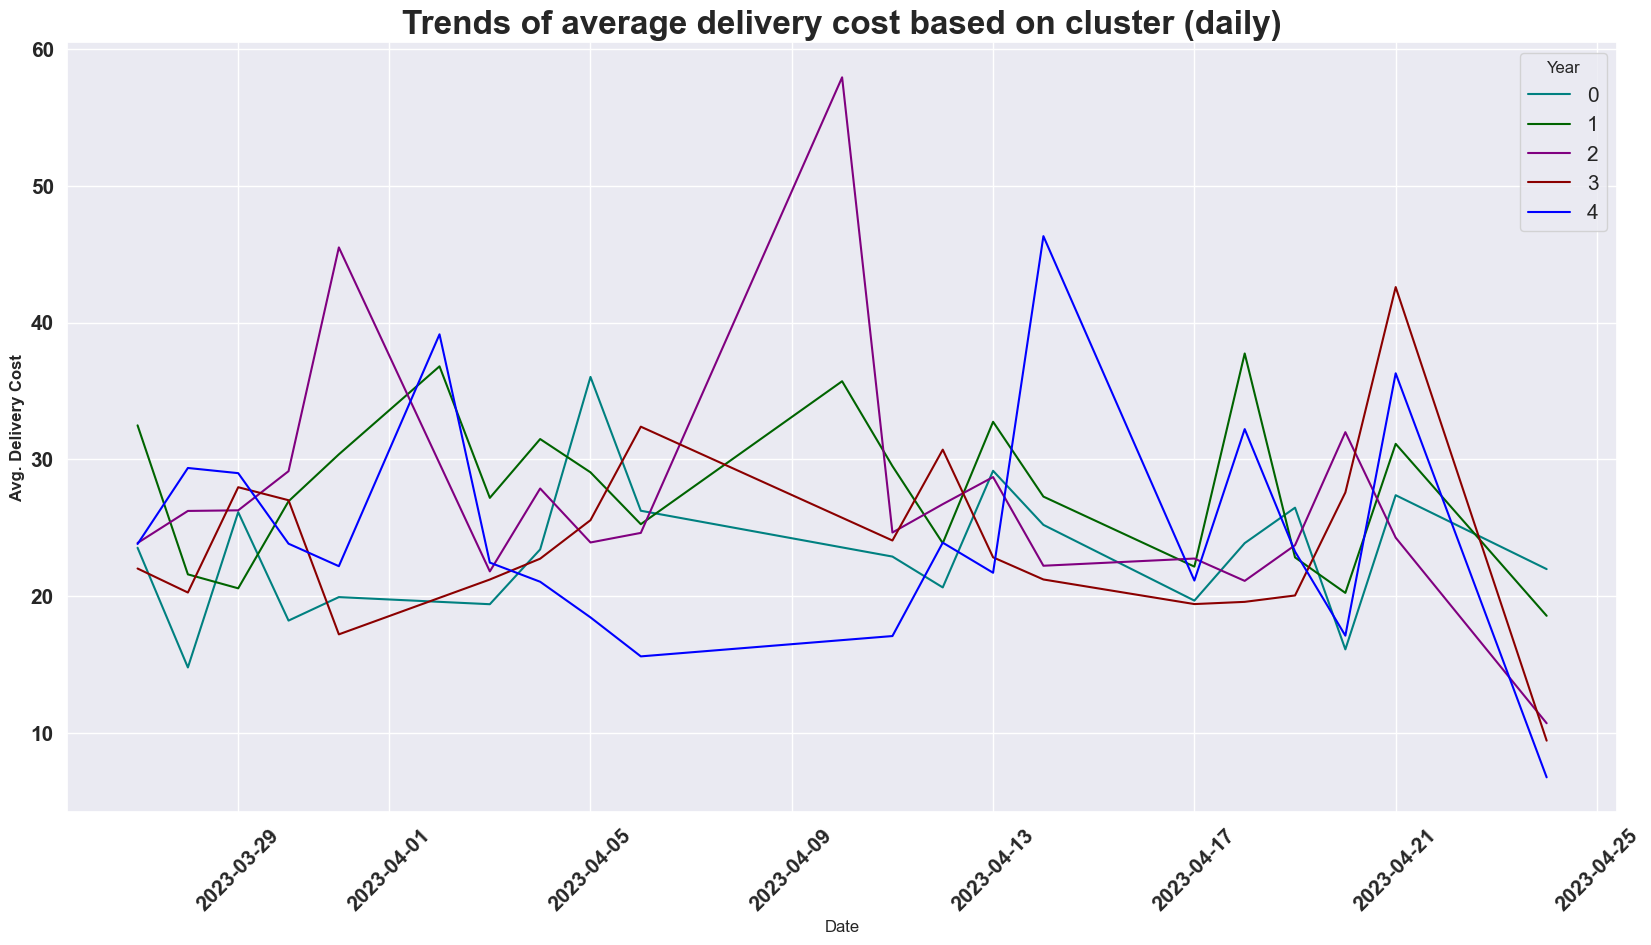

In [29]:
# Set figure size.
a = sns.set(rc={'figure.figsize':(20, 10)})

# Create a lineplot.
a = sns.lineplot(x='DateDespatched',y='DeliveryCost',hue='Cluster Label',data=df_clusterdateavg,ci=None, markers = True,
                 palette=['teal','darkgreen','purple','darkred','blue'])
a.set_title("Trends of average delivery cost based on cluster (daily)",fontsize=24,fontweight='bold')
a.set_ylabel("Avg. Delivery Cost",fontweight='bold')
a.set_xlabel("Date")
plt.legend(title='Year', fontsize=15)
plt.xticks(size=15,fontweight='bold',rotation = 45)
plt.yticks(size=15,fontweight='bold')

# displaying chart.
plt.show()

# Save chart
fig = a.get_figure()
fig.savefig('Appointments.jpg')
fig.savefig('Appointments.png')

In [30]:
df_courier = df.groupby(['Cluster Label','Courier'],as_index = False)[['ProductsExVAT',
                                                                       'DeliveryCost',
                                                                       'Weight','Volume (m3)',
                                                                       'Pallets']].sum()

df_courier.head()

,Cluster Label,Courier,ProductsExVAT,DeliveryCost,Weight,Volume (m3),Pallets
0,0,DX Express,10794.88,1093.19,2054.39,8.851006,7.780947
1,0,DX Freight,26082.95,3095.67,6478.66,92.249080,60.051889
2,0,MFS,42254.34,4288.96,17421.63,128.720347,87.002012
3,0,Split,5497.52,455.50,1984.17,25.613508,16.885948
4,1,DX Express,36987.37,3582.20,6766.44,32.567235,26.799213


### Average weight and dimensions per clusters per courier

In [31]:
df_courieravg = df.groupby(['Cluster Label','Courier'],as_index = False)[['ProductsExVAT',
                                                                       'DeliveryCost',
                                                                       'Weight','Volume (m3)',
                                                                       'Pallets']].mean()

df_courieravg

,Cluster Label,Courier,ProductsExVAT,DeliveryCost,Weight,Volume (m3),Pallets
0,0,DX Express,73.434558,7.436667,13.975442,0.060211,0.052932
1,0,DX Freight,173.886333,20.637800,43.191067,0.614994,0.400346
2,0,MFS,541.722308,54.986667,223.354231,1.650261,1.115410
3,0,Split,785.360000,65.071429,283.452857,3.659073,2.412278
4,1,DX Express,78.032426,7.557384,14.275190,0.068707,0.056538
5,1,DX Freight,188.933043,20.591891,43.467000,0.769212,0.460700
6,1,MFS,692.556935,59.877957,287.860464,1.982940,1.311756
7,1,Split,1054.269643,91.403571,367.622143,5.446957,3.197558
8,2,DX Express,90.957892,7.436393,14.895176,0.065528,0.058842
9,2,DX Freight,200.122718,21.806748,46.820146,0.699353,0.444291


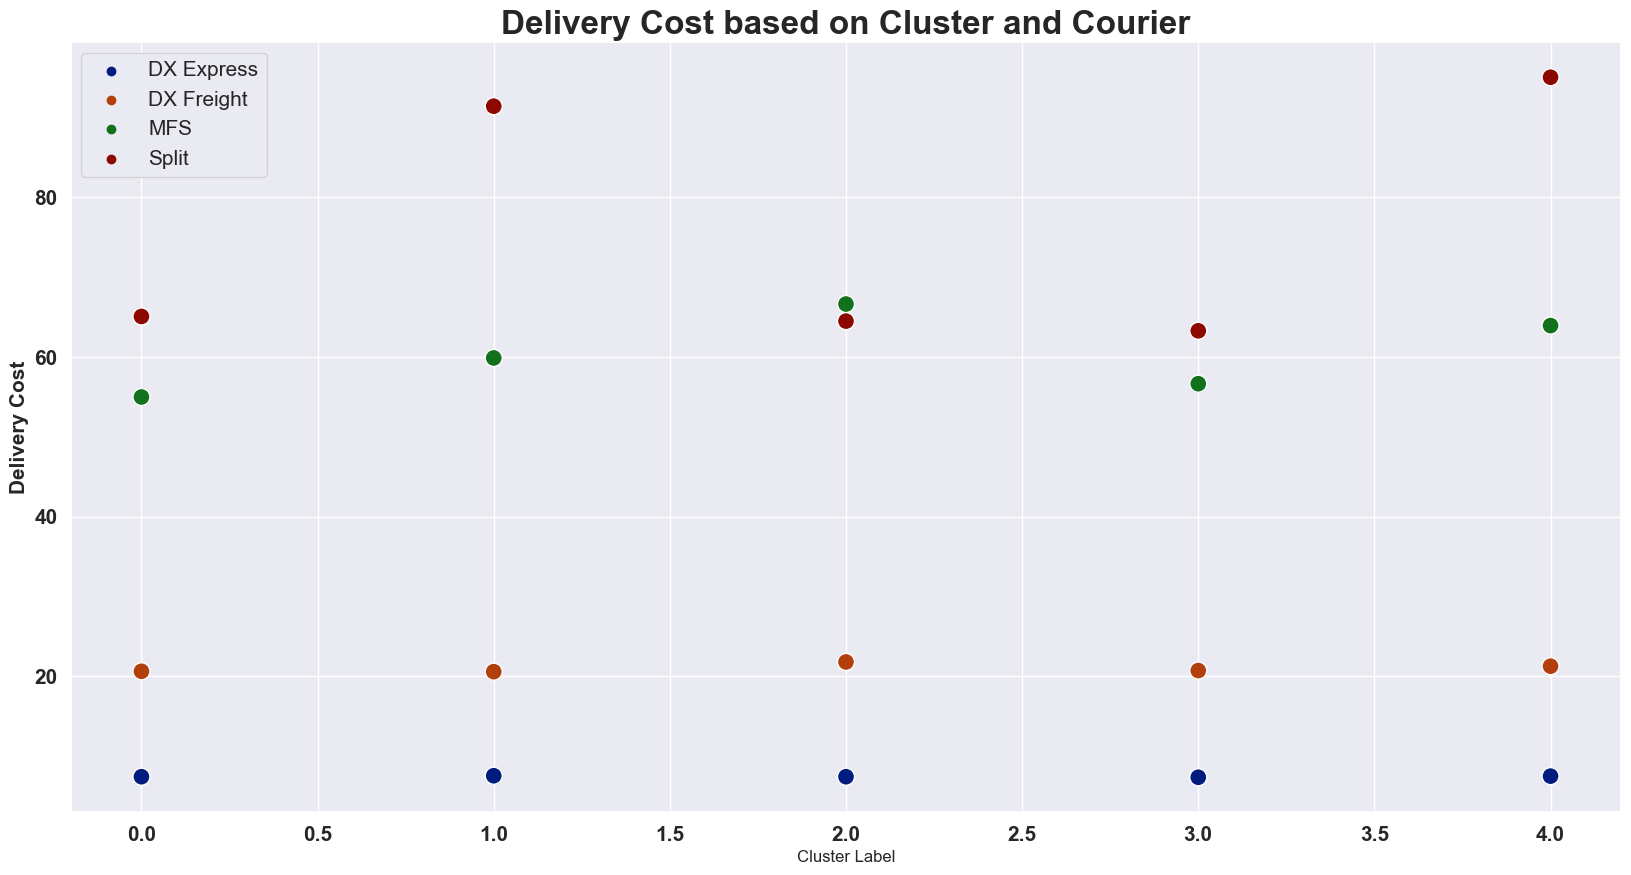

In [32]:
# Set figure size.
p = sns.set(rc={'figure.figsize':(20, 10)})

# Create scatterplot
p = sns.scatterplot(data = df_courieravg, x = 'Cluster Label', y='DeliveryCost', hue = 'Courier',s=150,
                    palette = 'dark')

# Set ticks, labels, titles and legend
plt.xticks(size=15,fontweight='bold')
plt.yticks(size=15,fontweight='bold')
plt.title('Delivery Cost based on Cluster and Courier',fontsize=24,fontweight='bold')
plt.ylabel('Delivery Cost',fontweight='bold',size=15)
plt.legend(fontsize=15)

# Show scatterplot.
plt.show()

# Save chart
fig = p.get_figure()
fig.savefig('Delcost_courier_cluster.png')

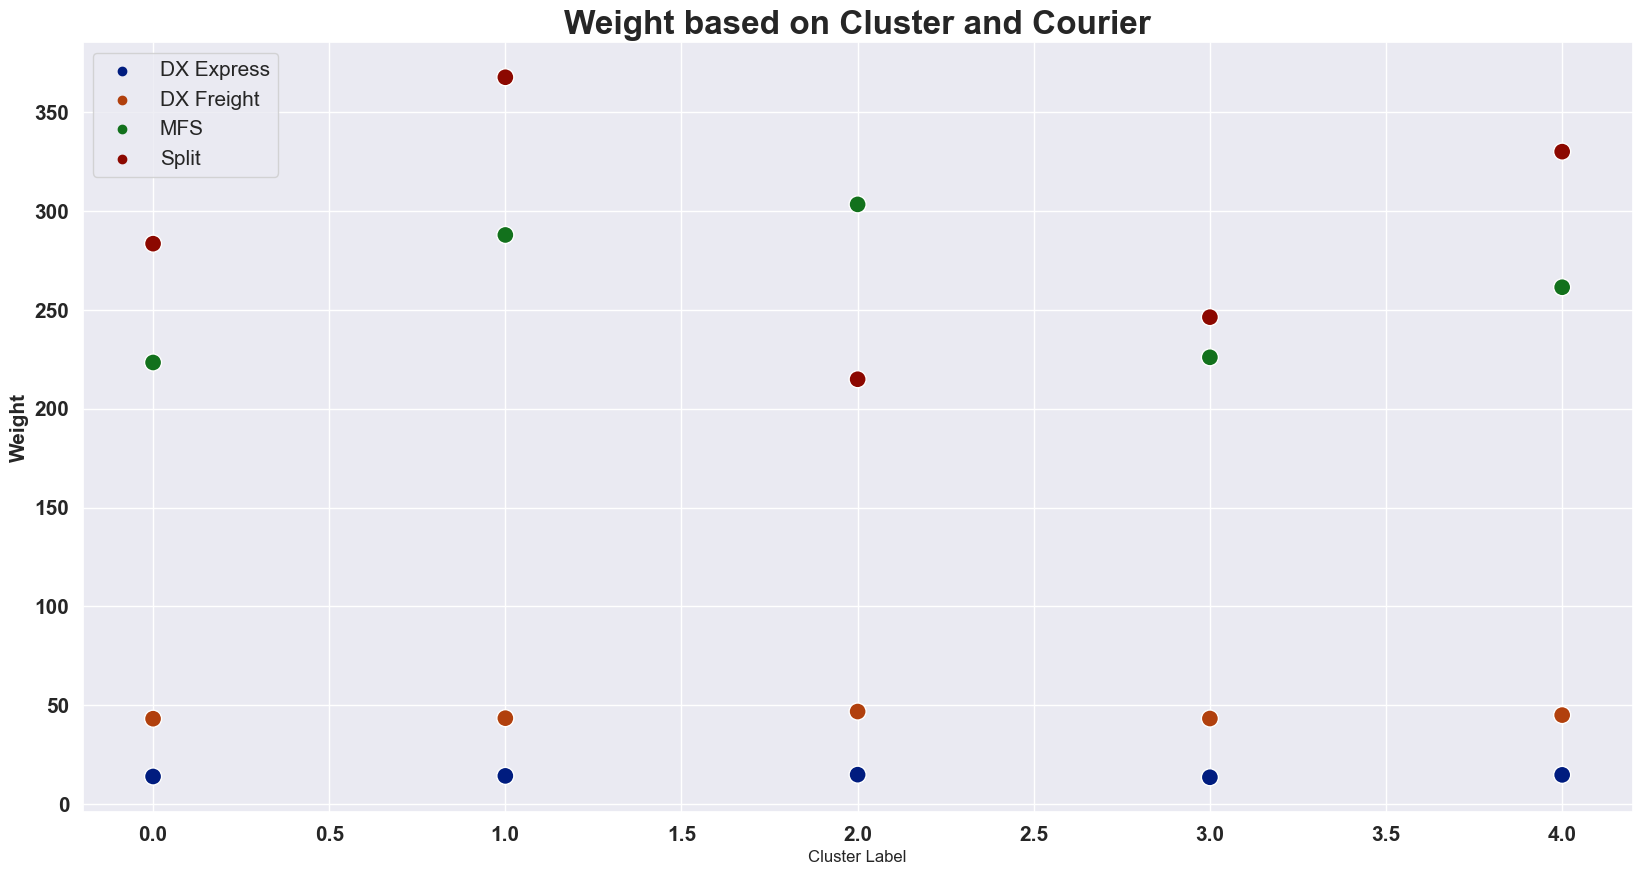

In [33]:
# Set figure size.
p = sns.set(rc={'figure.figsize':(20, 10)})

# Create scatterplot
p = sns.scatterplot(data = df_courieravg, x = 'Cluster Label', y='Weight', hue = 'Courier',s=150,
                    palette = 'dark')

# Set ticks, labels, titles and legend
plt.xticks(size=15,fontweight='bold')
plt.yticks(size=15,fontweight='bold')
plt.title('Weight based on Cluster and Courier',fontsize=24,fontweight='bold')
plt.ylabel('Weight',fontweight='bold',size=15)
plt.legend(fontsize=15)

# Show scatterplot.
plt.show()

# Save chart
fig = p.get_figure()
fig.savefig('Weight_courier_cluster.png')

C:\Users\christina.hudaja\AppData\Local\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


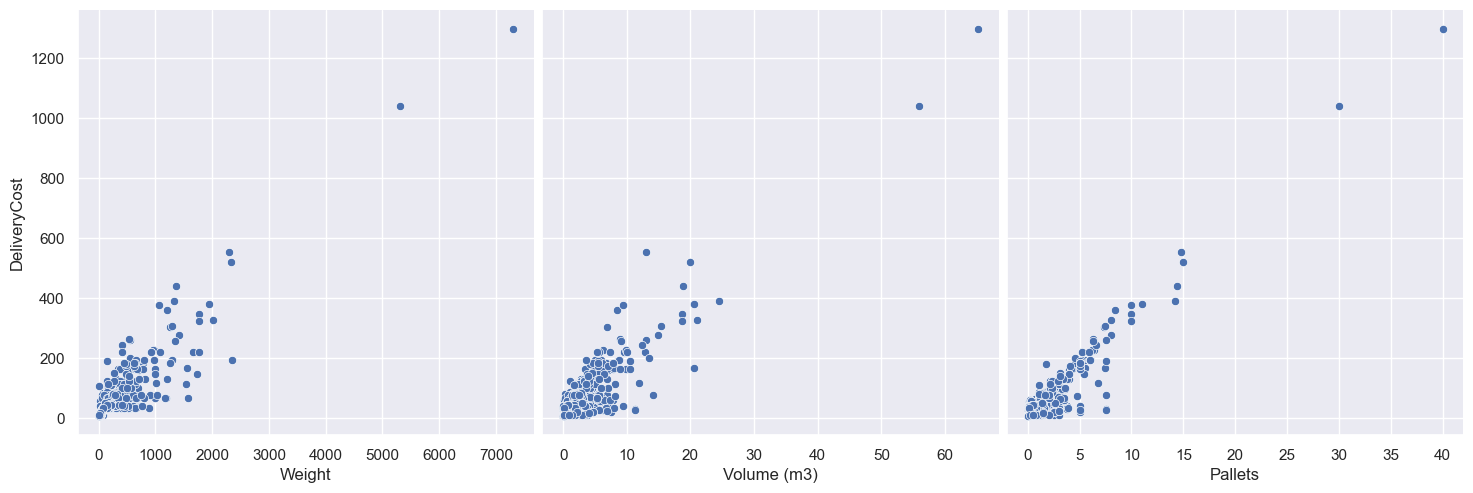

In [34]:
# Visualize the relationship between potential independent variables (spending_score & renumeration) 
# and the dependent variable(loyalty points)
sns.pairplot(data=df2, x_vars=['Weight','Volume (m3)','Pallets'],y_vars='DeliveryCost',size=5)

C:\Users\christina.hudaja\AppData\Local\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


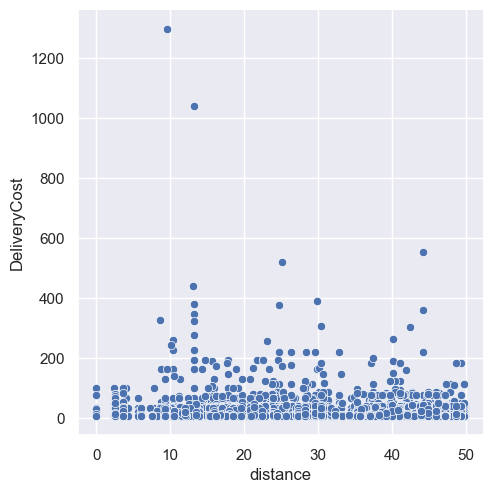

In [35]:
# Visualize the relationship between potential independent variables (spending_score & renumeration) 
# and the dependent variable(loyalty points)
sns.pairplot(data=df2, x_vars=['distance'],y_vars='DeliveryCost',size=5)

C:\Users\christina.hudaja\AppData\Local\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


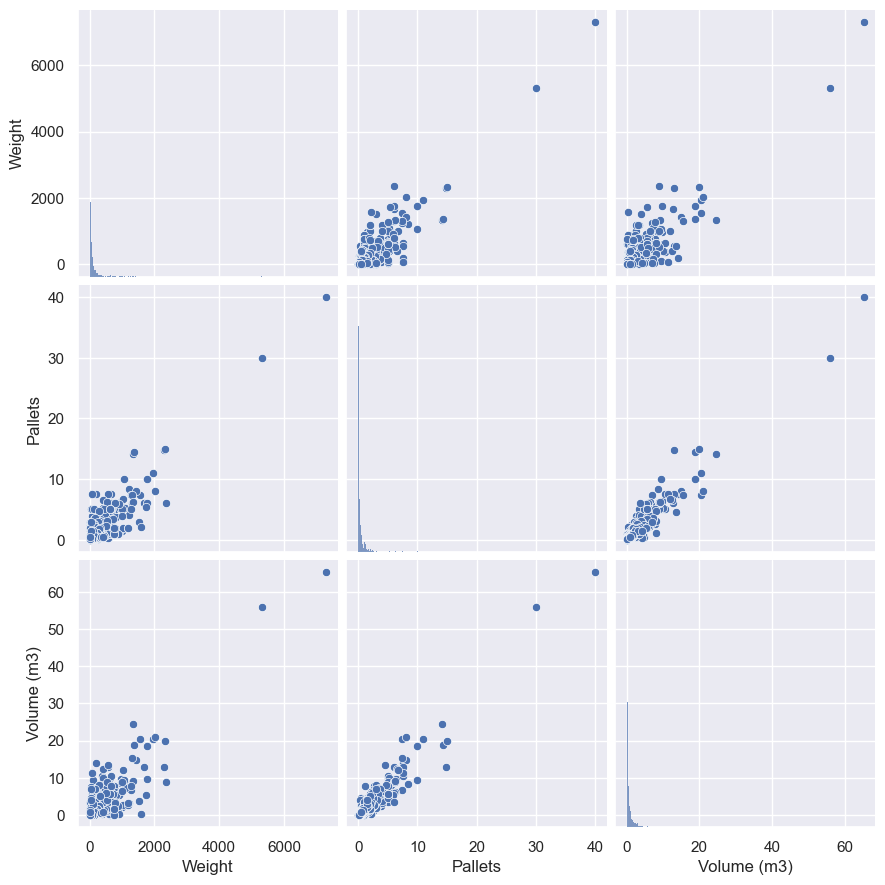

In [36]:
# Create a scatterplot to observe potential correlation among independent variables.
sns.pairplot(df2[['Weight','Pallets','Volume (m3)']],size=3)

1. weight vs deliverycost

<Axes: xlabel='Weight', ylabel='DeliveryCost'>

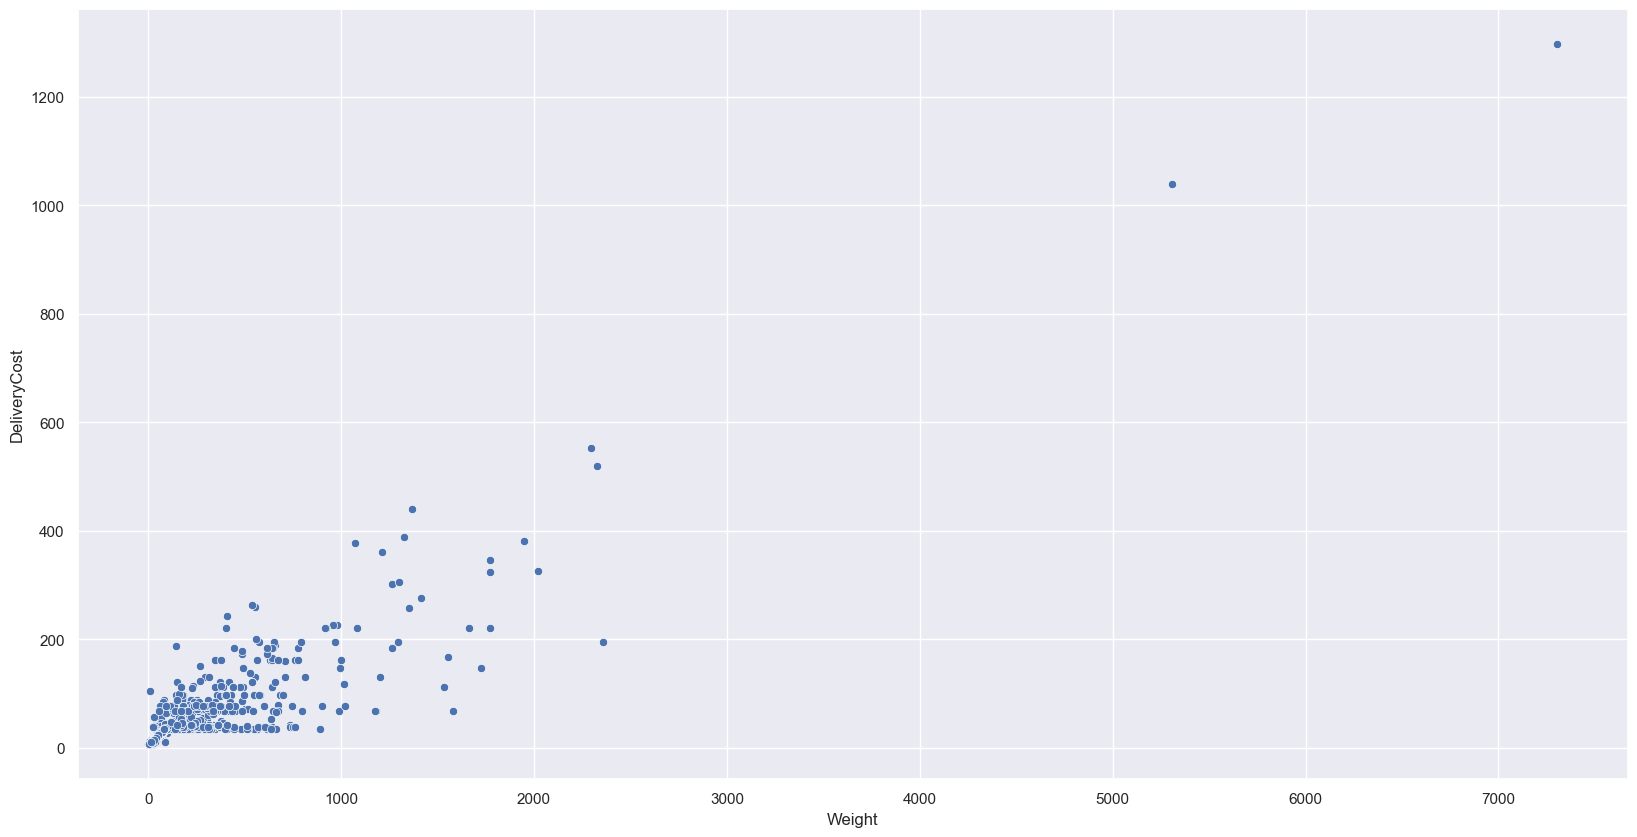

In [37]:
# Scatterplot to view possible linearity
sns.scatterplot(data=df2, x='Weight',y='DeliveryCost')

In [38]:
# Fit the linear model.
# Polyfit() good to use for simple linear regression (only one variable).
# Degree = 1, degree of polynomium, for SLR always 1.
reg_fin = np.polyfit(df2['Weight'], df2['DeliveryCost'], deg = 1)

# View output.
reg_fin

array([ 0.17258268, 10.61986476])

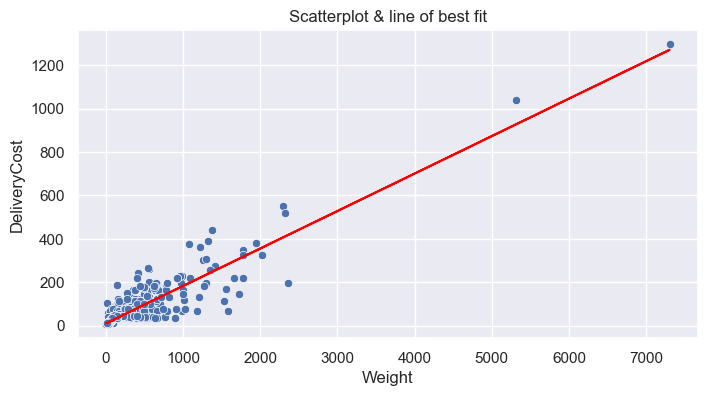

In [39]:
# Add a trendline to visualise the linear regression.
# Use the NumPy polyval method, specify the regression and the independent variable.
trend = np.polyval(reg_fin, df2['Weight'])

# View the previous scatterplot.
plt.figure(figsize=(8, 4), dpi=100)

plt.title("Scatterplot & line of best fit")
plt.xlabel('Weight')
plt.ylabel('DeliveryCost')

sns.scatterplot(data=df2, 
                x='Weight', 
                y='DeliveryCost')

# Add the trendline.
plt.plot(df2['Weight'], 
         trend,
         color='red')
plt.show()

In [40]:
# LinearRegression:
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import nltk 

In [41]:
# Independent variable.
x1= df2['Weight']

# Dependent variable.
y1 = df2['DeliveryCost']

# OLS model and summary.
f = 'y1 ~ x1'
test = ols(f, data = df2).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                 1.909e+04
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        11:57:08   Log-Likelihood:                -17657.
No. Observations:                4119   AIC:                         3.532e+04
Df Residuals:                    4117   BIC:                         3.533e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6199      0.295     36.030      0.000      10.042      11.198
x1             0.1726      0.001    138.169      0.000       0.170       0.175
==============================================================================
Omnibus:                     1316.692   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           298280.519
Skew:                          -0.034   Prob(JB):                         0.00
Kurtosis:                      44.689   Cond. No.                         254.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***The R-sqared from the OLS Regression Result above is indicating that XXX of the variability of loyalty points can be explained by the model's inputs, and the p-value being <0.05 is indicating that it is statistically significant***

***The value of Durbin-Watson of XXXX is indicating XXXX***

In [42]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())  

Parameters:  Intercept    10.619865
x1            0.172583
dtype: float64
Standard errors:  Intercept    0.294754
x1           0.001249
dtype: float64
Predicted values:  [29.6039594  16.36686795 14.38216715 ... 13.88167738 15.77663519
 12.79440651]


In [43]:
# Set the X coefficient and the constant to generate the regression table.
# x coef:0.172583.
# Constant coef: 10.619865.
# Create the linear equation.
y1_pred = 10.619865 + 0.172583 * x1

# View the output.
y1_pred

0       29.603995
1       16.366879
2       14.382174
3       13.686665
4       16.608495
          ...    
4114    11.458618
4115    14.727340
4116    13.881684
4117    15.776645
4118    12.794411
Name: Weight, Length: 4119, dtype: float64

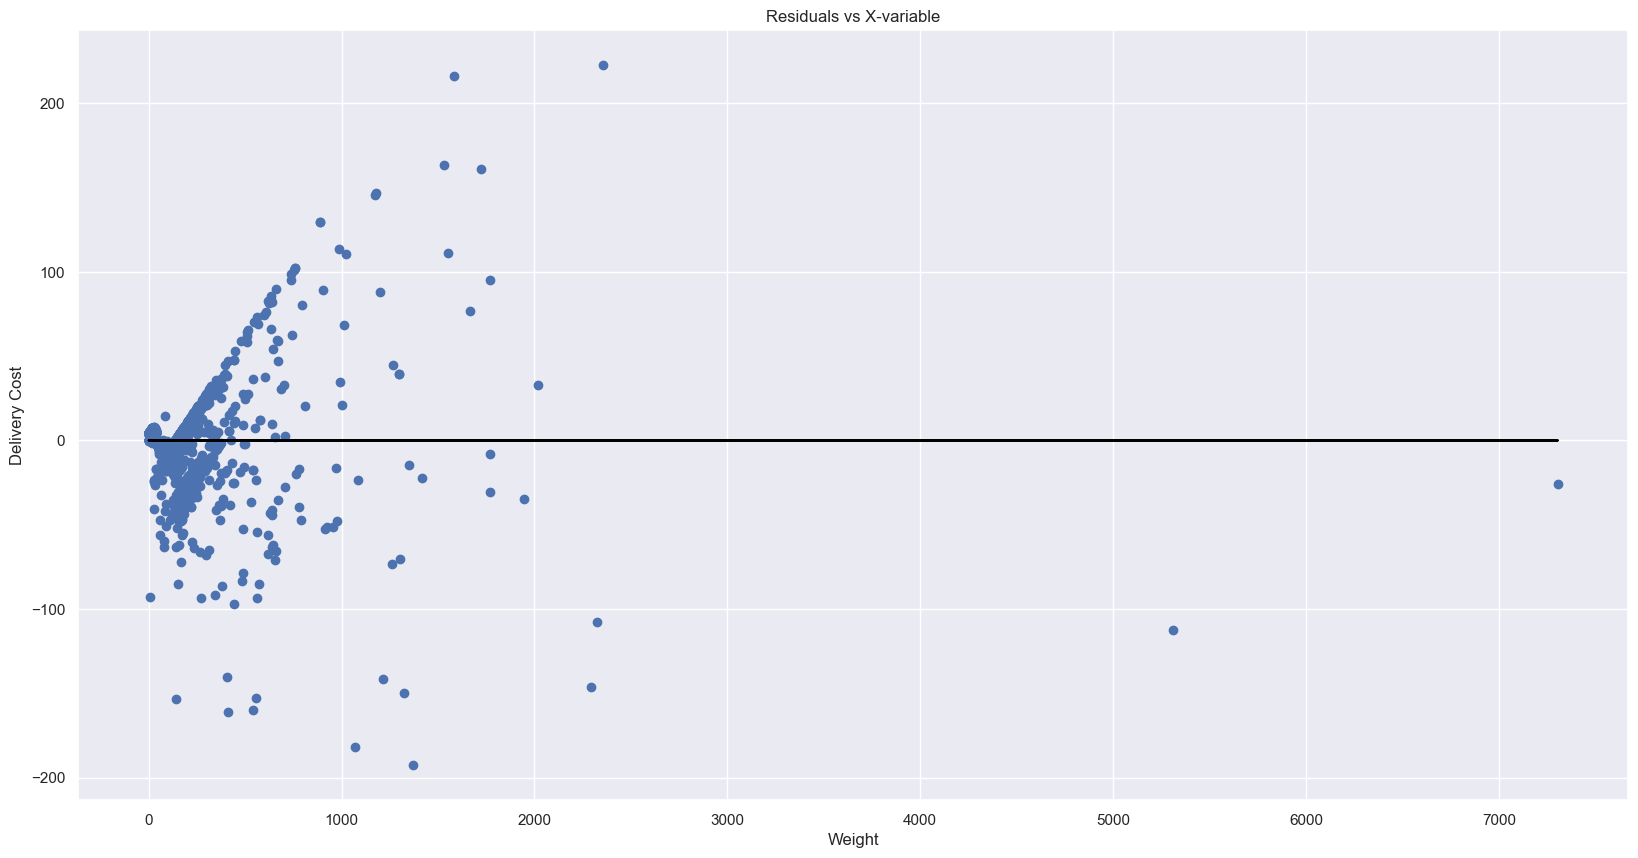

In [44]:
# Plot the residuals=(y-predict - y-observe) versus the x-values.
# Ideally, there should be no pattern in this plot

plt.scatter(x1, test.predict()- y1)
plt.plot(x1, y1 - y1, color='black')
plt.title("Residuals vs X-variable")
plt.xlabel("Weight")
plt.ylabel("Delivery Cost")
plt.show()

***Conduct Shapiro-Wilk test to determine whether the residual is normally distributed***

In [45]:
# Calculate the residual.
residual = y1 - y1_pred

# import useful library
import numpy as np
from numpy.random import poisson
from numpy.random import seed
from scipy.stats import shapiro
from numpy.random import randn
 
# conduct the  Shapiro-Wilk Test
shapiro(residual)

ShapiroResult(statistic=0.5744867324829102, pvalue=0.0)

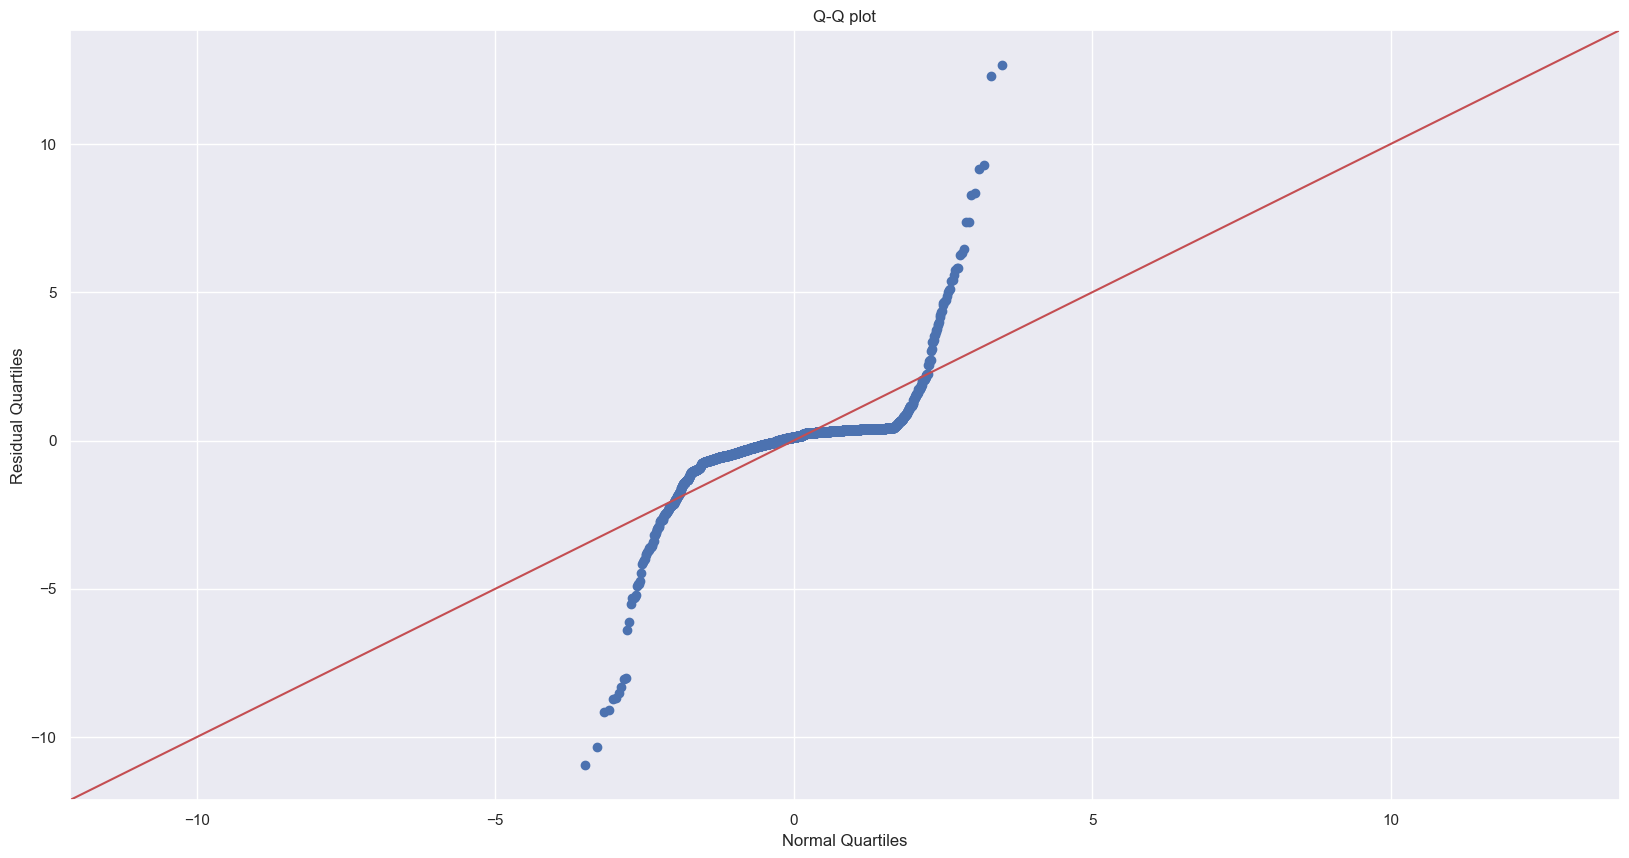

In [46]:
# Import qqplot library
from statsmodels.graphics.gofplots import qqplot

# Residuals are calcualted
residuals = test.predict() - y1  

# Plot the quartiles of the residuals versus the quartiles of the N(0,1)
# The fit=True argument first Standardises the observed data (Residuals) before plotting them

sm.qqplot(residuals, fit=True, line='45')
plt.ylabel("Residual Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

***Shapiro-Wilk test with p-value < 0.05 and QQplot indicate that the residual is not normally distributed***

In [47]:
# Import the necessary library.
import statsmodels.stats.api as sms

# Run the Breusch-Pagan test function on the model residuals and x-variables.
test = sms.het_breuschpagan(test.resid, test.model.exog)

# Print the results of the Breusch-Pagan test.
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, test)))

{'LM stat': 1081.0294989333408, 'LM Test p-value': 4.3857855421048293e-237, 'F-stat': 1464.990672406437, 'F-test p-value': 1.714524458766318e-274}


***LM Test p-value of < 0.05, reject null hypothesis and assume that heteroscedasticity is present.***

2. Pallets vs. DeliveryCost

<Axes: xlabel='Volume (m3)', ylabel='DeliveryCost'>

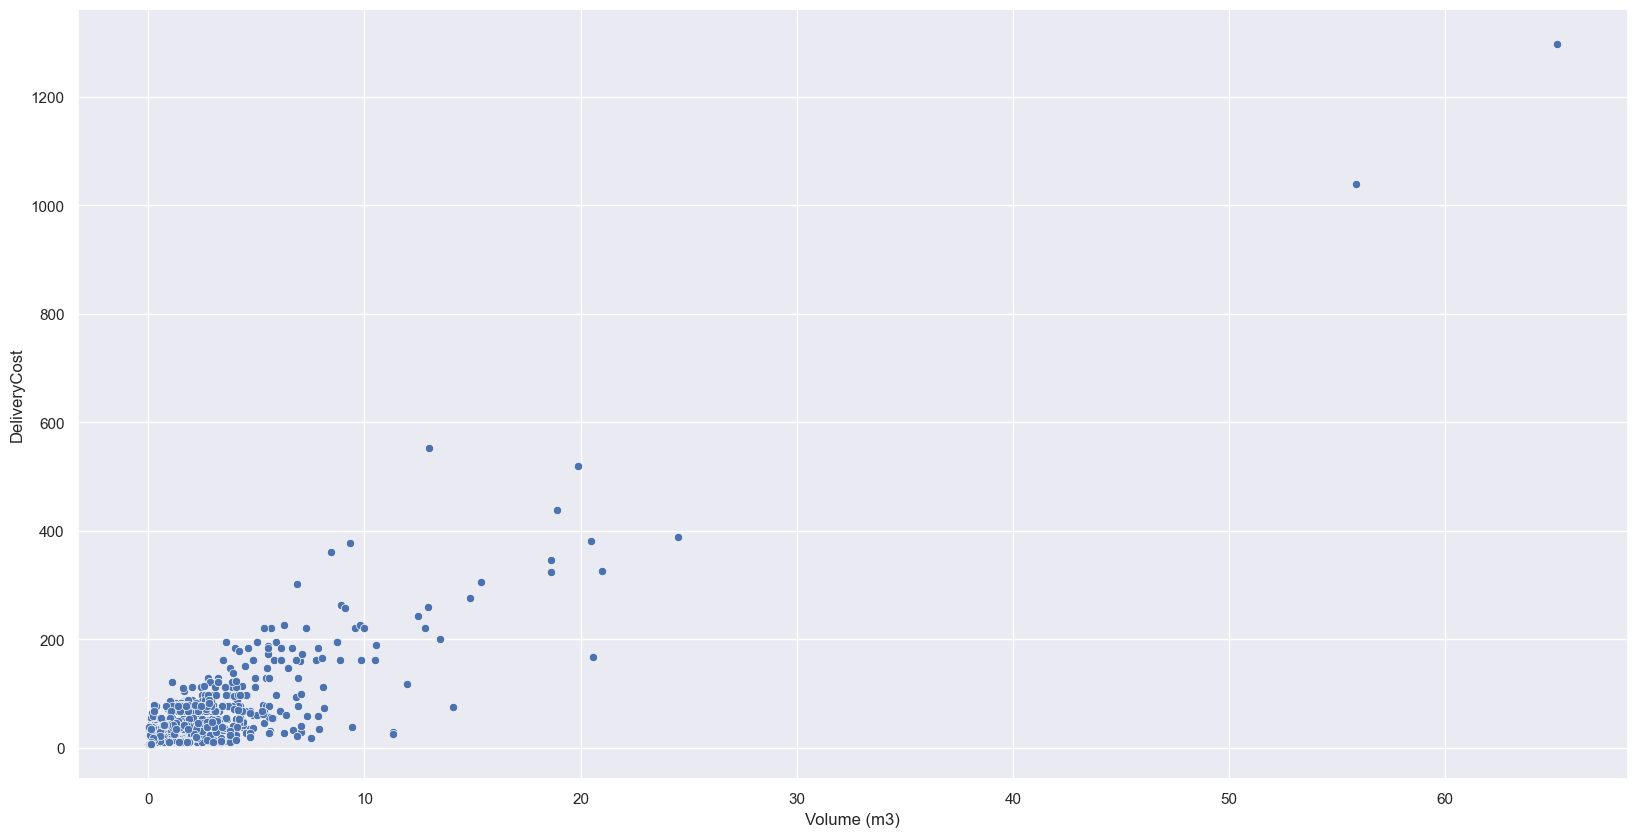

In [48]:
# Scatterplot to view possible linearity
sns.scatterplot(data=df2, x='Volume (m3)',y='DeliveryCost')

In [49]:
# Fit the linear model.
# Polyfit() good to use for simple linear regression (only one variable).
# Degree = 1, degree of polynomium, for SLR always 1.
reg_fin2 = np.polyfit(df2['Volume (m3)'], df2['DeliveryCost'], deg = 1)

# View output.
reg_fin2

array([17.4858672 , 11.25590445])

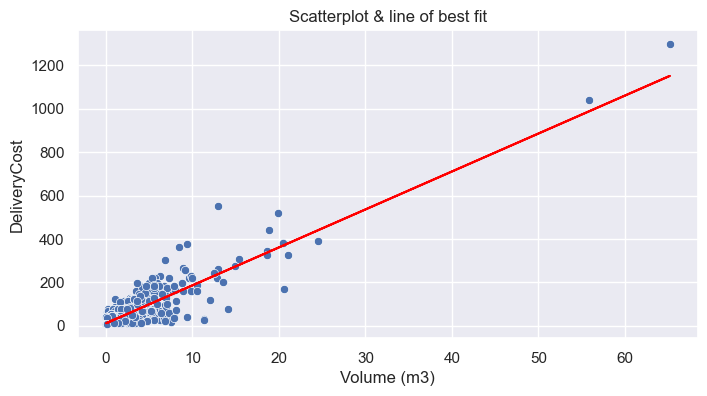

In [50]:
# Add a trendline to visualise the linear regression.
# Use the NumPy polyval method, specify the regression and the independent variable.
trend2 = np.polyval(reg_fin2, df2['Volume (m3)'])

# View the previous scatterplot.
plt.figure(figsize=(8, 4), dpi=100)

plt.title("Scatterplot & line of best fit")
plt.xlabel('Volume (m3)')
plt.ylabel('DeliveryCost')

sns.scatterplot(data=df2, 
                x='Volume (m3)', 
                y='DeliveryCost')

# Add the trendline.
plt.plot(df2['Volume (m3)'], 
         trend2,
         color='red')
plt.show()

In [51]:
# Independent variable.
x2= df2['Volume (m3)']

# Dependent variable.
y2 = df2['DeliveryCost']

# OLS model and summary.
f2 = 'y2 ~ x2'
test2 = ols(f2, data = df2).fit()

# View the output.
test2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                 1.409e+04
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        11:57:09   Log-Likelihood:                -18157.
No. Observations:                4119   AIC:                         3.632e+04
Df Residuals:                    4117   BIC:                         3.633e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.2559      0.332     33.879      0.000      10.605      11.907
x2            17.4859      0.147    118.686      0.000      17.197      17.775
==============================================================================
Omnibus:                     1687.195   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           219778.840
Skew:                           0.921   Prob(JB):                         0.00
Kurtosis:                      38.738   Cond. No.                         2.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***The R-sqared from the OLS Regression Result above is indicating that XXX of the variability of loyalty points can be explained by the model's inputs, and the p-value being <0.05 is indicating that it is statistically significant***

***The value of Durbin-Watson of XXXX is indicating a negative autocorrelation***

In [52]:
# Extract the estimated parameters.
print("Parameters: ", test2.params)  

# Extract the standard errors.
print("Standard errors: ", test2.bse)  

# Extract the predicted values.
print("Predicted values: ", test2.predict()) 

Parameters:  Intercept    11.255904
x2           17.485867
dtype: float64
Standard errors:  Intercept    0.332239
x2           0.147329
dtype: float64
Predicted values:  [15.19022457 28.0248511  14.91219928 ... 35.93196025 82.43499458
 27.70660831]


In [53]:
# Set the X coefficient and the constant to generate the regression table.
# x coef:30.291149.
# Constant coef: 9.371076.
# Create the linear equation.
y2_pred = 9.371076 + 30.291149 * x1

# View the output.
y2_pred

0       3341.397466
1       1018.066338
2        669.718124
3        547.644794
4       1060.473946
           ...     
4114     156.586060
4115     730.300422
4116     581.873792
4117     914.470608
4118     391.039553
Name: Weight, Length: 4119, dtype: float64

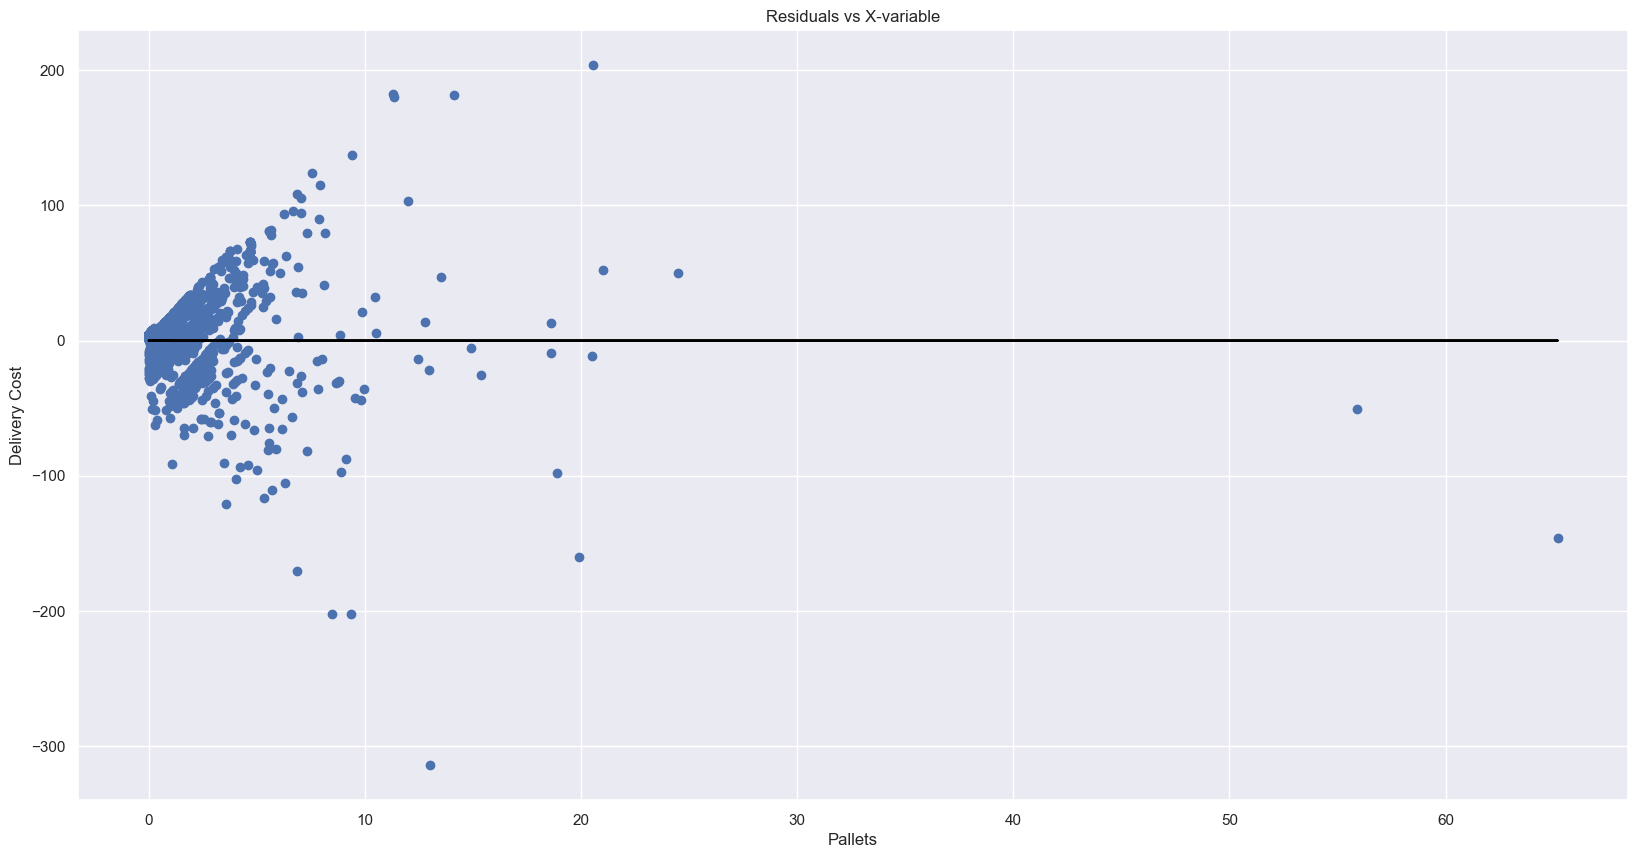

In [54]:
# Plot the residuals=(y-predict - y-observe) versus the x-values.
# Ideally, there should be no pattern in this plot

plt.scatter(x2, test2.predict()- y2)
plt.plot(x2, y2 - y2, color='black')
plt.title("Residuals vs X-variable")
plt.xlabel("Pallets")
plt.ylabel("Delivery Cost")
plt.show()

***Conduct Shapiro-Wilk test to determine whether the residual is normally distributed***

In [55]:
# Calculate the residual.
residual2 = y2 - y2_pred

# import useful library
import numpy as np
from numpy.random import poisson
from numpy.random import seed
from scipy.stats import shapiro
from numpy.random import randn
 
# conduct the  Shapiro-Wilk Test
shapiro(residual2)

ShapiroResult(statistic=0.304044246673584, pvalue=0.0)

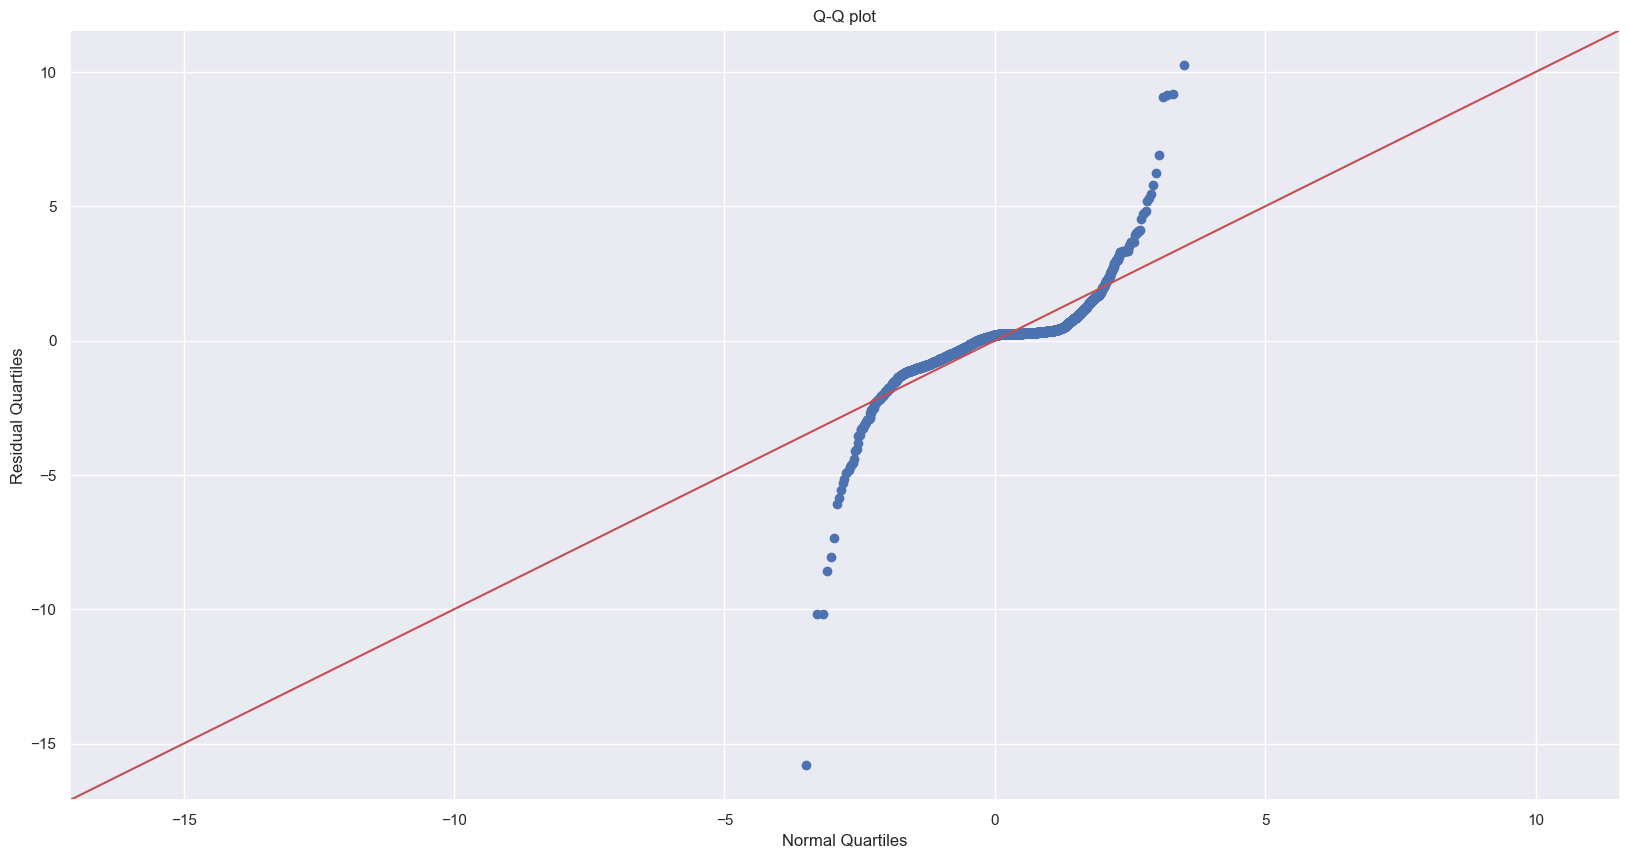

In [56]:
# Residuals are calcualted
residuals2 = test2.predict() - y2  

# Plot the quartiles of the residuals versus the quartiles of the N(0,1)
# The fit=True argument first Standardises the observed data (Residuals) before plotting them

sm.qqplot(residuals2, fit=True, line='45')
plt.ylabel("Residual Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

In [57]:
# Run the Breusch-Pagan test function on the model residuals and x-variables.
test2 = sms.het_breuschpagan(test2.resid, test2.model.exog)

# Print the results of the Breusch-Pagan test.
terms2= ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms2, test2)))

{'LM stat': 833.9242770314543, 'LM Test p-value': 2.272488012555819e-183, 'F-stat': 1045.1102312600694, 'F-test p-value': 1.5878602244635379e-204}


***LM Test p-value of < 0.05, reject null hypothesis and assume that heteroscedasticity is present.***

MULTIPLE LINEAR REGRESSION

In [58]:
# Define dependent and independent variable.
X0 = df2[['Weight','Pallets']]
y0 = df2[['DeliveryCost']]

In [59]:
# View Variables
print(X0.head())
print(y0.head())

   Weight   Pallets
0  110.00  0.200000
1   33.30  0.473039
2   21.80  0.222222
3   17.77  0.030342
4   34.70  0.052361
   DeliveryCost
0         34.46
1         16.45
2         11.79
3          6.81
4         11.46


In [60]:
# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X0, y0) 

LinearRegression()

In [61]:
# Call the predictions for X (array).
mlr.predict(X0) 

array([[21.33961637],
       [20.1210628 ],
       [14.59857692],
       ...,
       [24.02309513],
       [38.8429844 ],
       [18.9369718 ]])

In [62]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X0,y0))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X0, mlr.coef_)) 

R-squared:  0.9039468507530972
Intercept:  [8.76472512]
Coefficients:


[('Weight', array([ 0.08104033, 18.30227714]))]

In [63]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X0_train, X0_test, y0_train, y0_test = sklearn.model_selection.train_test_split(X0, y0,
                                                                            test_size = 0.20,
                                                                            random_state = 5)

In [64]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model0 = sm.OLS(y0_train, sm.add_constant(X0_train)).fit()

# Set the predicted response vector.
y0_pred = model0.predict(sm.add_constant(X0_train)) 

# Call a summary of the model.
print_model0 = model0.summary()

# Print the summary.
print(print_model0)  

                            OLS Regression Results                            
Dep. Variable:           DeliveryCost   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 1.645e+04
Date:                Mon, 22 May 2023   Prob (F-statistic):               0.00
Time:                        11:57:10   Log-Likelihood:                -13067.
No. Observations:                3295   AIC:                         2.614e+04
Df Residuals:                    3292   BIC:                         2.616e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9184      0.241     37.070      0.0

In [65]:
# Specify the model.
mlr = LinearRegression()  

# Fit the model. We can only fit the model with the training data set.
mlr.fit(X0_train, y0_train)  

LinearRegression()

In [66]:
# Call the predictions for X in the train set.
y_pred_mlr0 = mlr.predict(X0_train)  

# Print the predictions.
print("Prediction for train set: {}".format(y_pred_mlr0)) 

Prediction for train set: [[ 9.99975297]
 [23.82858489]
 [18.4893444 ]
 ...
 [ 9.7143935 ]
 [60.9875391 ]
 [14.49775138]]


In [67]:
print(mlr.score(X0_train, y0_train)*100)

90.90211614533514


TestModel

In [68]:
y_pred_test0 = mlr.predict(X0_test) 

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_test0))  

Prediction for test set: [[ 10.09117328]
 [ 18.60370648]
 [ 21.01613549]
 [ 16.99484453]
 [ 10.73417863]
 [ 14.70226039]
 [ 10.75155761]
 [  9.5001188 ]
 [ 40.54392885]
 [  9.9669412 ]
 [ 37.34081128]
 [  9.53309499]
 [ 11.28649146]
 [ 32.53807519]
 [ 40.62160461]
 [ 11.94101306]
 [ 11.03283491]
 [ 11.07008705]
 [459.77895934]
 [ 51.4030236 ]
 [ 16.00740245]
 [ 10.73340129]
 [ 16.67851883]
 [ 11.09539635]
 [ 42.07269618]
 [ 75.36358618]
 [ 13.92806326]
 [ 38.72693469]
 [ 45.7455589 ]
 [ 13.44218503]
 [ 19.15529231]
 [ 13.94215095]
 [ 12.01104885]
 [ 13.60888316]
 [ 18.10976991]
 [ 28.23965593]
 [ 72.04584683]
 [ 19.63445557]
 [ 34.93154367]
 [ 10.52709965]
 [ 19.15481956]
 [ 15.26740538]
 [ 10.36969696]
 [ 13.86443693]
 [ 28.58778762]
 [ 12.82079117]
 [ 31.78718952]
 [  9.18733728]
 [ 12.46803781]
 [ 24.01515336]
 [ 21.2178456 ]
 [  9.92576589]
 [  9.83468831]
 [ 16.33759362]
 [ 33.66516912]
 [  9.79956207]
 [  9.94834938]
 [ 10.03031418]
 [  9.77566174]
 [ 14.0249761 ]
 [ 11.91331889]

In [69]:
# Print the R-squared value.
print(mlr.score(X0_test, y0_test)*100)  

87.8883433836234


### Check for multicollinearity

In [70]:
# Check multicollinearity.
x_temp0 = sm.add_constant(X0_train)

# Create an empty DataFrame. 
vif0 = pd.DataFrame()

# Calculate the VIF for each value.
vif0['VIF Factor'] = [variance_inflation_factor(x_temp0.values,
                                               i) for i in range(x_temp0.values.shape[1])]

# Create the feature columns.
vif0['features'] = x_temp0.columns

# Print the values to one decimal points.
print(vif0.round(1))

   VIF Factor features
0         1.2    const
1         4.0   Weight
2         4.0  Pallets


In [71]:
# Determine heteroscedasticity.
model0 = sms.het_breuschpagan(model0.resid, model0.model.exog) 

In [72]:
terms0 = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms0, model0)))

{'LM stat': 680.2478325254642, 'LM Test p-value': 1.9322352635231813e-148, 'F-stat': 428.21952545444003, 'F-test p-value': 5.0192124279100004e-166}


***CONCLUSION : LM Test p-value >0.05, fail to reject null hypothesis which assume that homoscedasticity is present***

In [73]:
# Call the ‘metrics.mean_absolute_error’ function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y0_test, y_pred_test0))  

# Call the ‘metrics.mean_squared_error’ function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y0_test, y_pred_test0))  

Mean Absolute Error (Final): 8.099930990715276
Mean Square Error (Final): 189.29729232244893


In [74]:
# Plotting y test against y prediction
sns.regplot(y0_test,y_pred_test0)

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
y_pred_test0

In [ ]:
y0_test

In [ ]:
sns.regplot = 